<a href="https://colab.research.google.com/github/KormazovaVer/Lab_1/blob/main/Lab_3_Kormazova_VO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from tensorflow.keras import layers, models

In [3]:
from google.colab import drive
# Подключение Google Диска
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
# Копирование файла из каталога Google Диска в текущее рабочее пространство
!cp -r  /content/drive/MyDrive/anomaly-free /content/

!cp -r /content/drive/MyDrive/valve1 /content/

!cp -r /content/drive/MyDrive/valve2 /content/

In [5]:
# Чтение данных
train = pd.read_csv('/content/anomaly-free/anomaly-free.csv', delimiter= ';')

In [6]:
train

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
0,2020-02-08 13:30:47,0.202394,0.275154,2.16975,0.382638,90.6454,26.8508,238.852,122.664
1,2020-02-08 13:30:48,0.203153,0.277857,2.07999,-0.273216,90.7978,26.8639,227.943,122.338
2,2020-02-08 13:30:50,0.202054,0.275790,2.52577,0.382638,90.7730,26.8603,223.486,121.338
3,2020-02-08 13:30:51,0.203595,0.278101,2.49742,0.054711,90.8424,26.8616,244.904,121.664
4,2020-02-08 13:30:52,0.201889,0.276363,2.29194,0.710565,90.6664,26.8603,239.196,122.000
...,...,...,...,...,...,...,...,...,...
9400,2020-02-08 16:16:43,0.225744,0.267921,2.91598,0.054711,88.8593,29.3792,219.542,126.000
9401,2020-02-08 16:16:44,0.205870,0.258370,1.71505,0.710565,89.1754,29.3692,221.862,126.000
9402,2020-02-08 16:16:45,0.219222,0.267244,2.35834,-0.273216,89.1306,29.3674,226.050,126.679
9403,2020-02-08 16:16:46,0.219481,0.271278,2.49108,0.054711,88.5447,29.3757,226.343,127.000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9405 entries, 0 to 9404
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             9405 non-null   object 
 1   Accelerometer1RMS    9405 non-null   float64
 2   Accelerometer2RMS    9405 non-null   float64
 3   Current              9405 non-null   float64
 4   Pressure             9405 non-null   float64
 5   Temperature          9405 non-null   float64
 6   Thermocouple         9405 non-null   float64
 7   Voltage              9405 non-null   float64
 8   Volume Flow RateRMS  9405 non-null   float64
dtypes: float64(8), object(1)
memory usage: 661.4+ KB


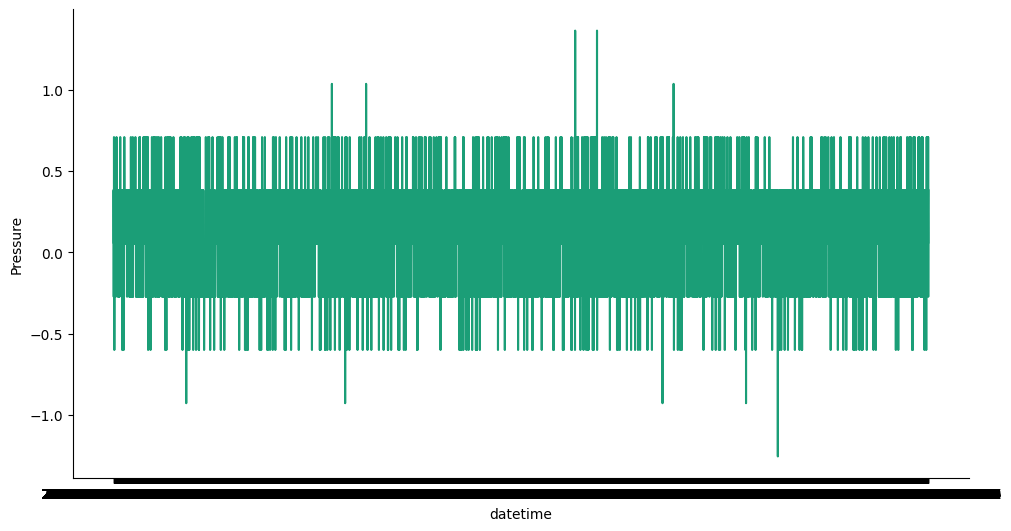

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['Pressure']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('Pressure')

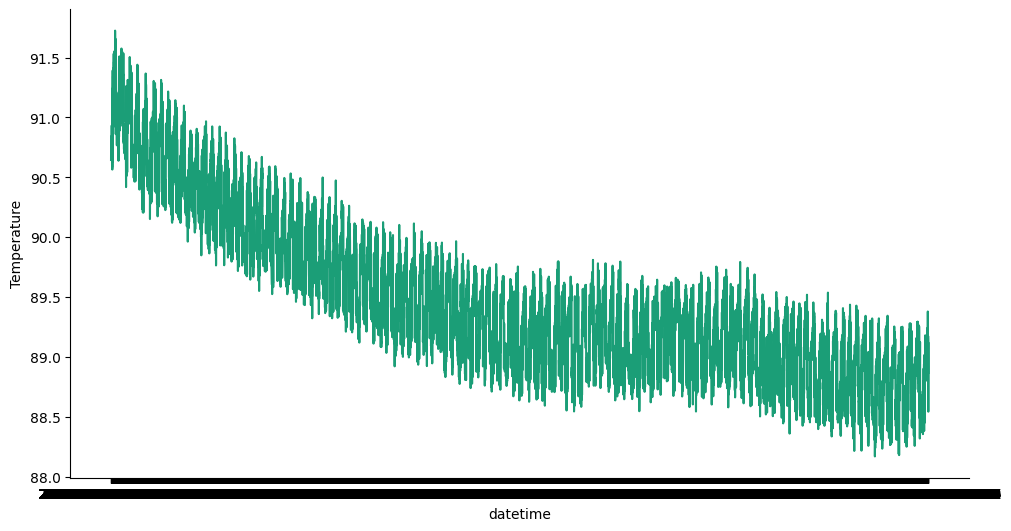

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['Temperature']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('Temperature')

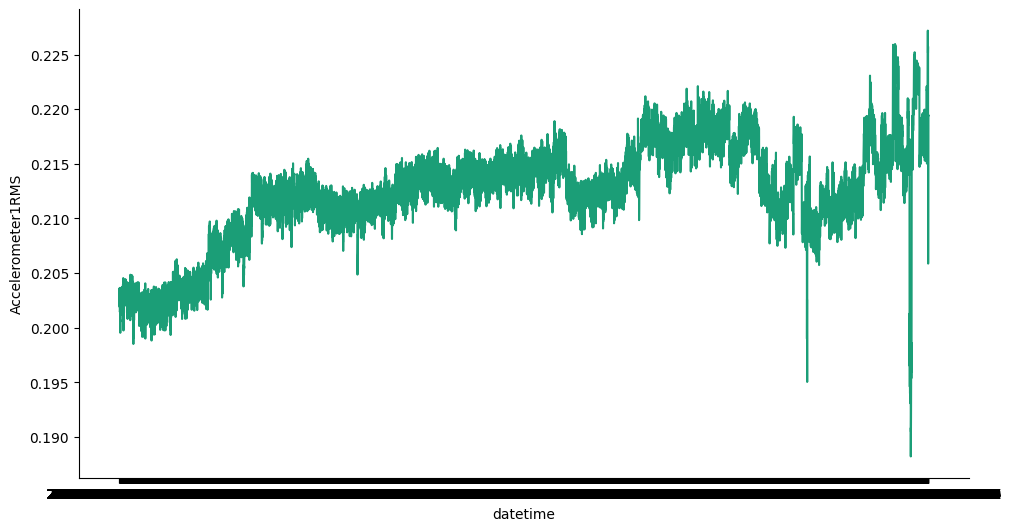

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['Accelerometer1RMS']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('Accelerometer1RMS')

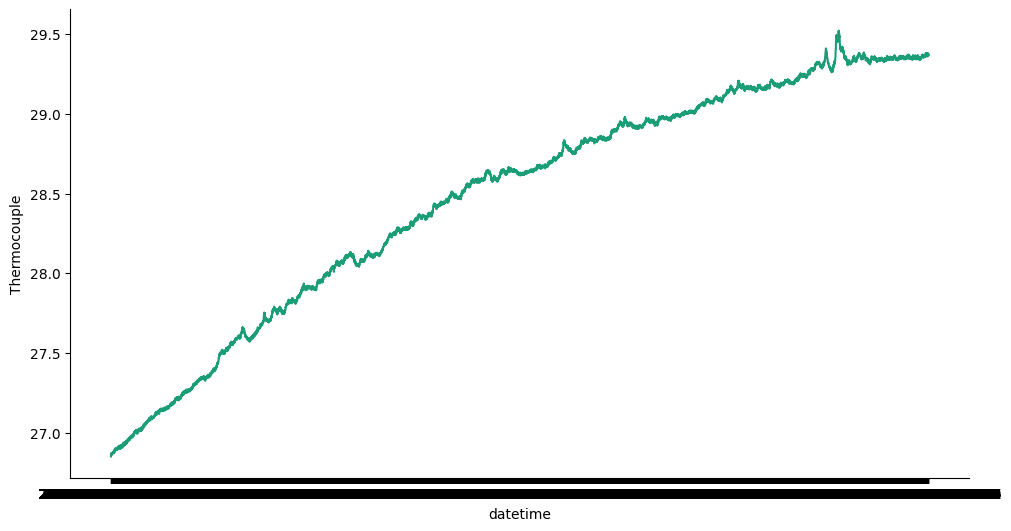

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['Thermocouple']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('Thermocouple')


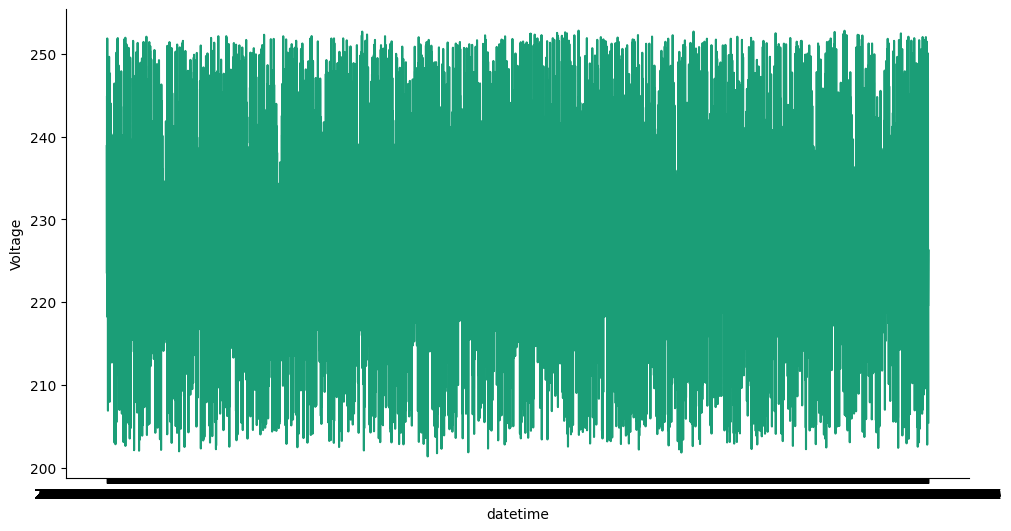

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['Voltage']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('Voltage')

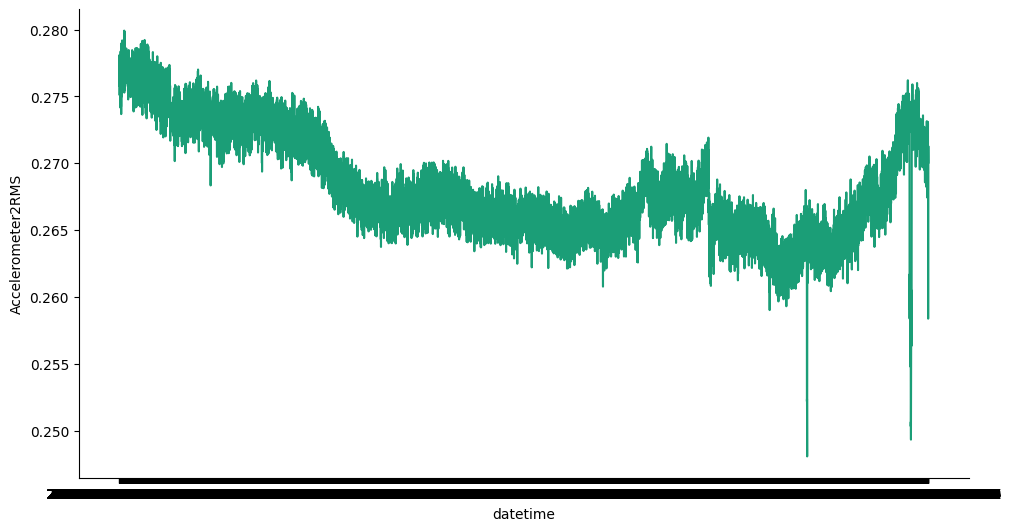

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['Accelerometer2RMS']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('Accelerometer2RMS')

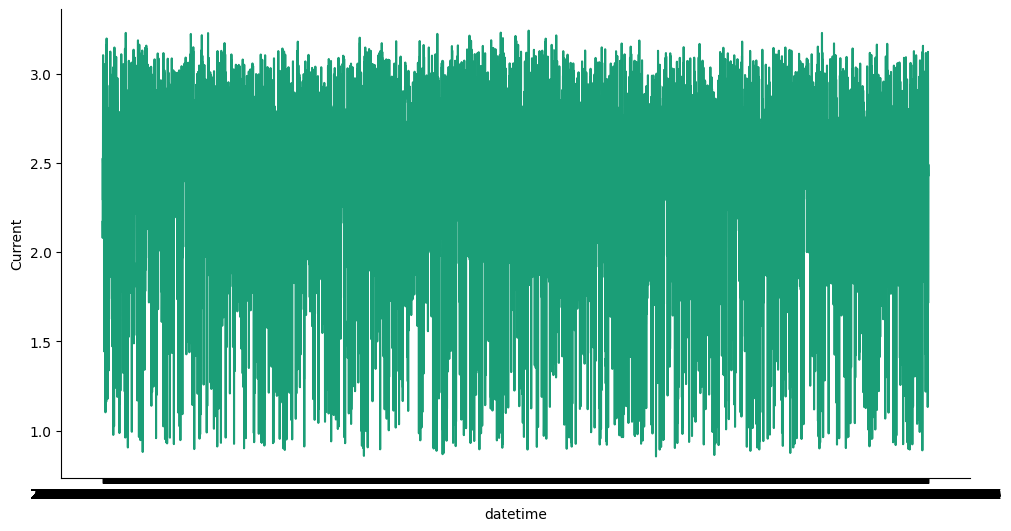

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['Current']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('Current')

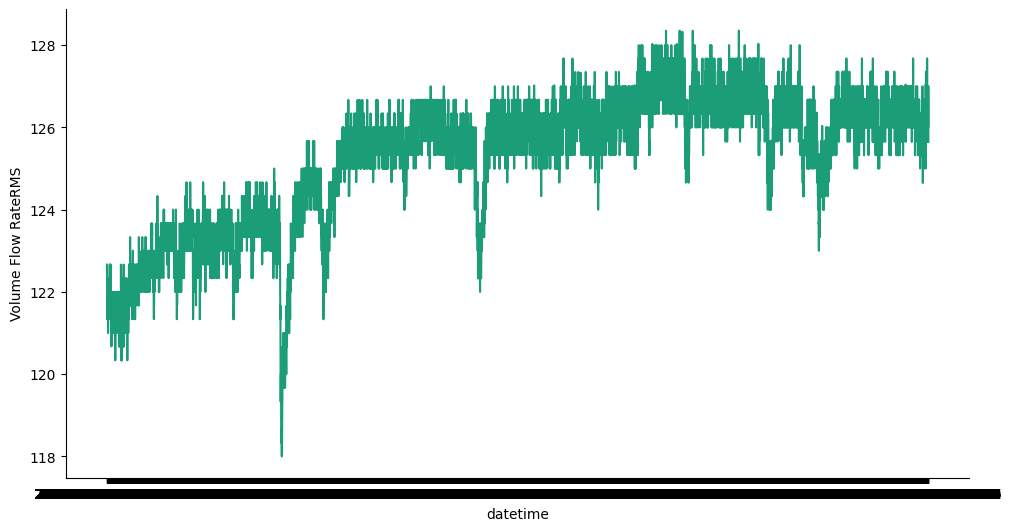

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['Volume Flow RateRMS']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = train.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('Volume Flow RateRMS')

In [11]:
def combine_csv_files(directory, output_file="test_v1.csv"):
    """Combines multiple CSV files based on the 'datetime' column."""

    all_data = []
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            try:
                #MODIFIED: Read data with a semicolon separator:
                df = pd.read_csv(filepath, sep=';') # Note sep=';' - try this if your data is semi-colon separated

                #Crucial: Check for "datetime" column, otherwise, try alternative names
                if 'datetime' in df.columns:
                    #Crucial: Use 'coerce' to handle unrecognised formats
                    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
                elif 'Timestamp' in df.columns:
                     df['datetime'] = pd.to_datetime(df['Timestamp'], errors='coerce')
                elif 'Date' in df.columns:
                     df['datetime'] = pd.to_datetime(df['Date'], errors='coerce')
                else:
                  print(f"Error: No suitable datetime column found in {filename}. Make sure the column is named 'datetime', 'Timestamp', or 'Date' or specify the correct column name. ")
                  continue #Skip to next file if no suitable column found.

                #Crucial: Remove rows with any null values generated by conversion errors in datetime column:
                df.dropna(subset=['datetime'],inplace=True)
                all_data.append(df)
            except pd.errors.EmptyDataError:
                print(f"Skipping empty file: {filename}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")

    if not all_data:
        print("No valid CSV files found in the directory.")
        return

    combined_df = pd.concat(all_data, ignore_index=True)
    try:
      combined_df = combined_df.sort_values('datetime')
      combined_df = combined_df.reset_index(drop=True)
      combined_df.to_csv(output_file, index=False)
      print(f"Files combined successfully into {output_file}")

    except Exception as e:
      print(f"Error during combine and write to file: {e}")

# Example usage:
directory_path = '/content/valve1/'
combine_csv_files(directory_path)

Files combined successfully into test_v1.csv


In [101]:
test_valve1 = pd.read_csv('/content/test_v1.csv', delimiter= ',')

In [102]:
test_valve1

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 10:14:33,0.026588,0.040111,1.330200,0.054711,79.3366,26.0199,233.062,32.0000,0.0,0.0
1,2020-03-09 10:14:34,0.026170,0.040453,1.353990,0.382638,79.5158,26.0258,236.040,32.0000,0.0,0.0
2,2020-03-09 10:14:35,0.026199,0.039419,1.540060,0.710565,79.3756,26.0265,251.380,32.0000,0.0,0.0
3,2020-03-09 10:14:36,0.026027,0.039641,1.334580,0.382638,79.6097,26.0393,234.392,32.0000,0.0,0.0
4,2020-03-09 10:14:37,0.026290,0.040273,1.078510,-0.273216,79.6109,26.0420,225.342,32.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18155,2020-03-09 15:34:37,0.027605,0.039760,0.622996,0.382638,68.4247,24.4370,230.358,32.9673,0.0,0.0
18156,2020-03-09 15:34:38,0.027286,0.039613,0.600692,0.054711,68.0598,24.4356,231.373,32.0000,0.0,0.0
18157,2020-03-09 15:34:39,0.027203,0.041440,0.450323,0.054711,68.1836,24.4379,210.605,32.0337,0.0,0.0
18158,2020-03-09 15:34:40,0.027180,0.041831,0.855527,0.382638,68.2250,24.4310,229.566,32.9673,0.0,0.0


In [104]:
test_valve1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18160 entries, 0 to 18159
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             18160 non-null  object 
 1   Accelerometer1RMS    18160 non-null  float64
 2   Accelerometer2RMS    18160 non-null  float64
 3   Current              18160 non-null  float64
 4   Pressure             18160 non-null  float64
 5   Temperature          18160 non-null  float64
 6   Thermocouple         18160 non-null  float64
 7   Voltage              18160 non-null  float64
 8   Volume Flow RateRMS  18160 non-null  float64
 9   anomaly              18160 non-null  float64
 10  changepoint          18160 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.5+ MB


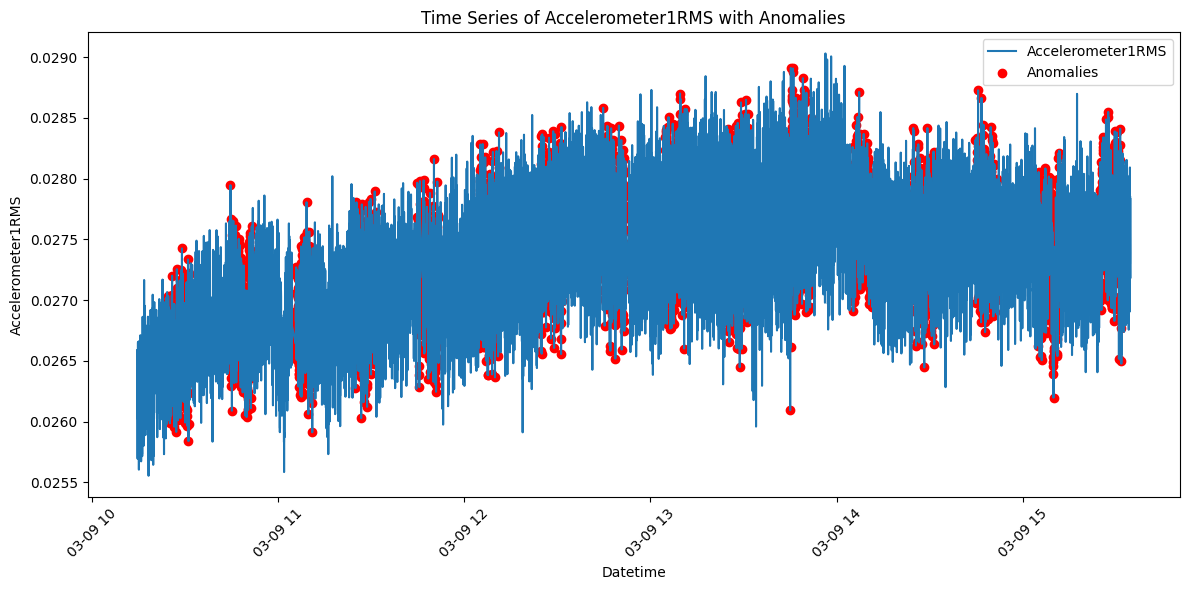

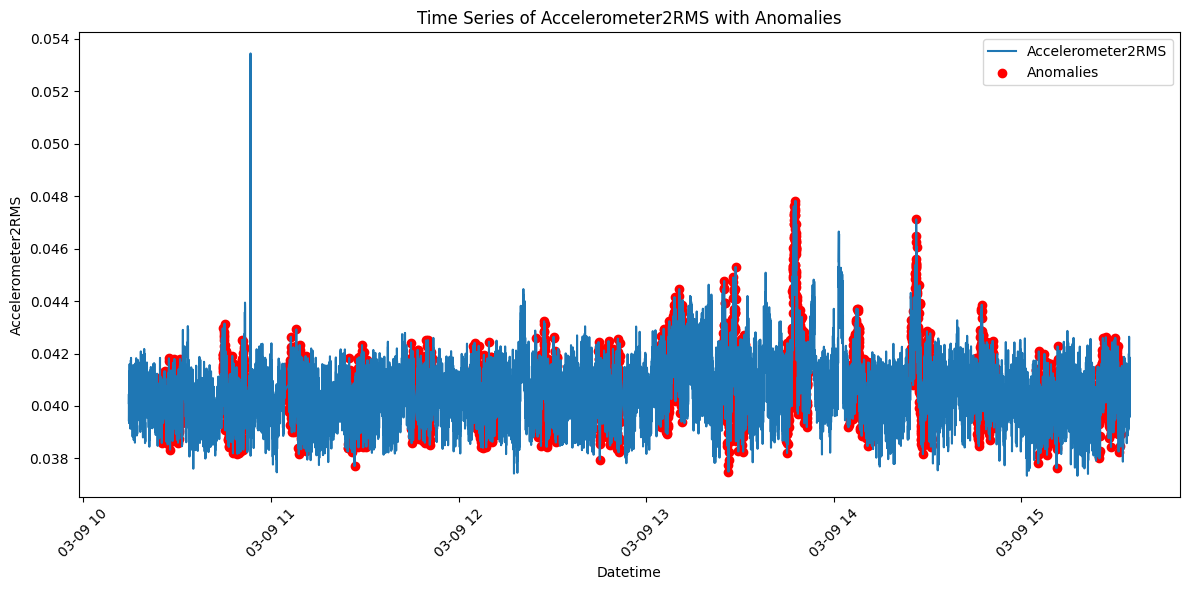

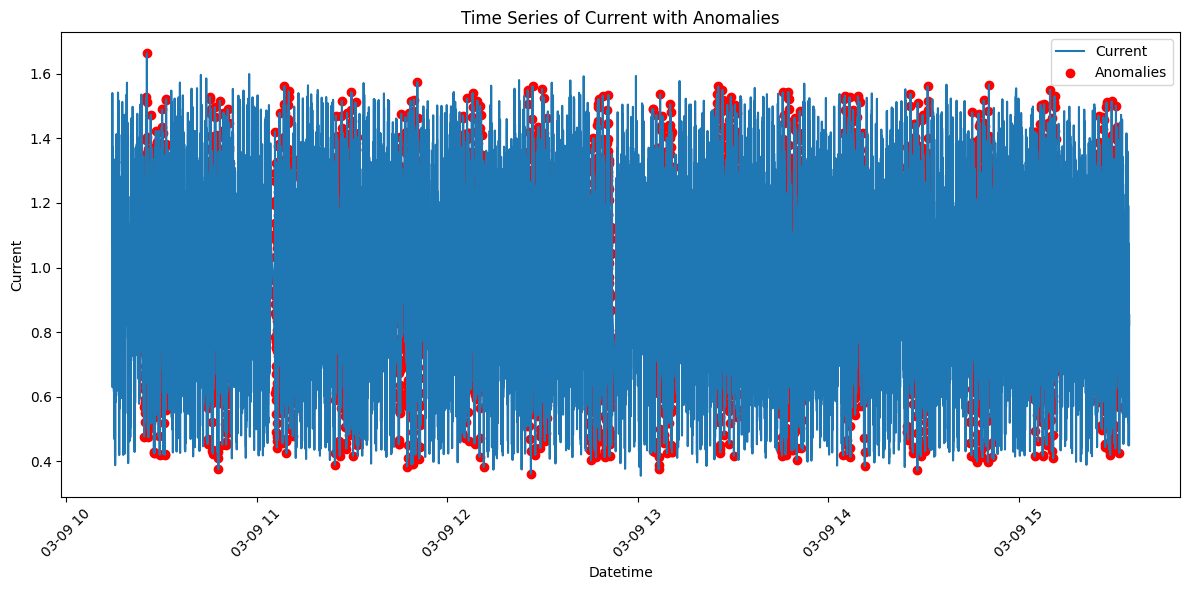

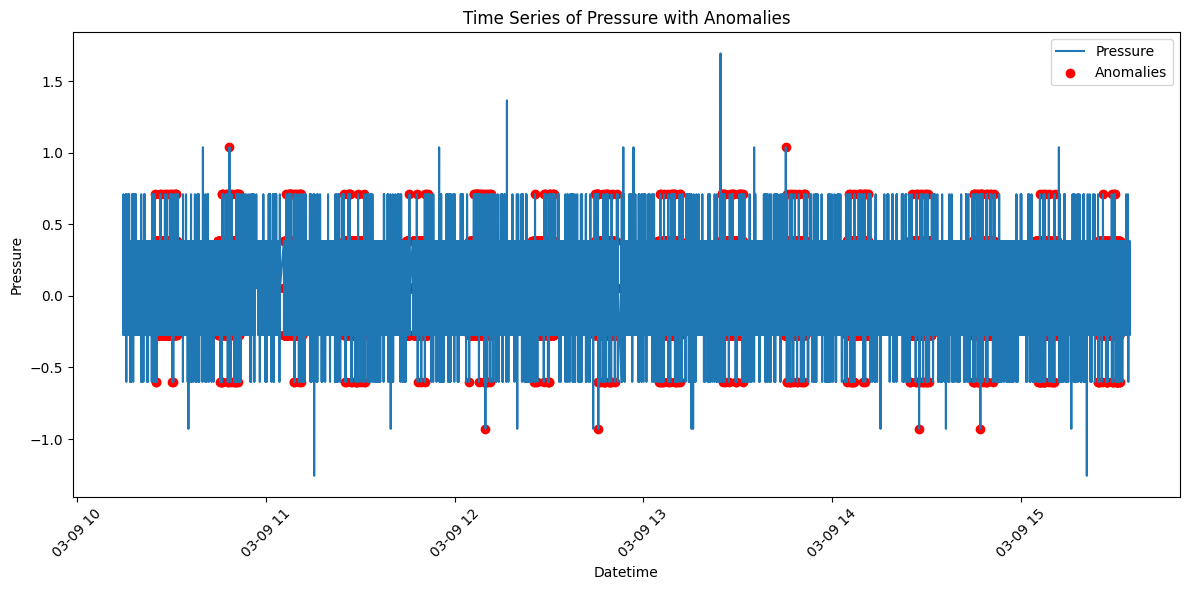

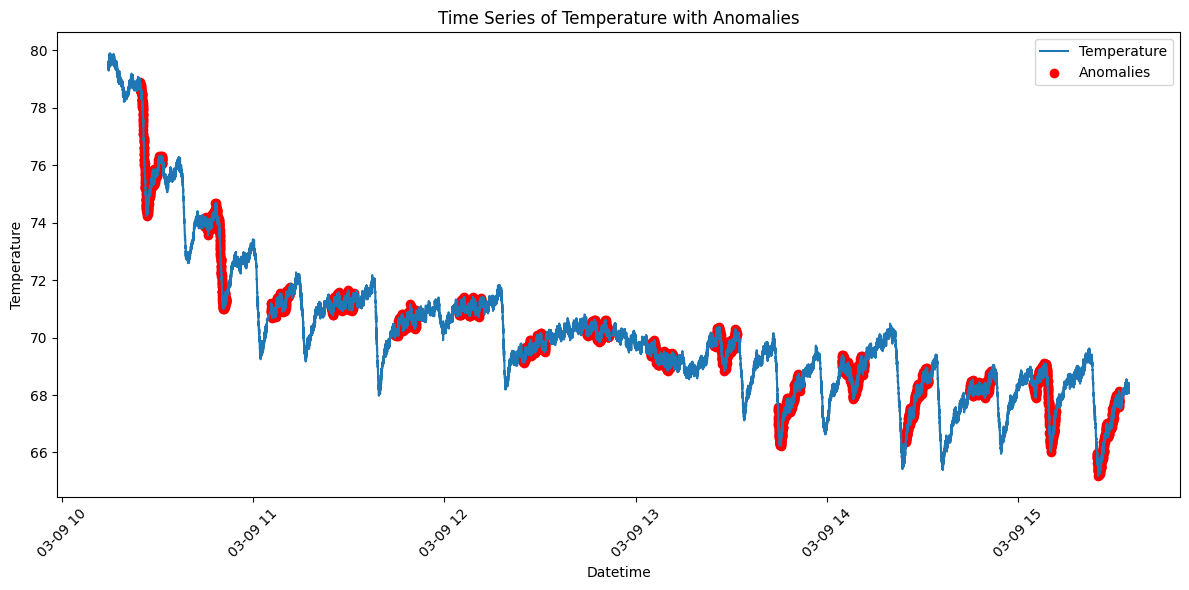

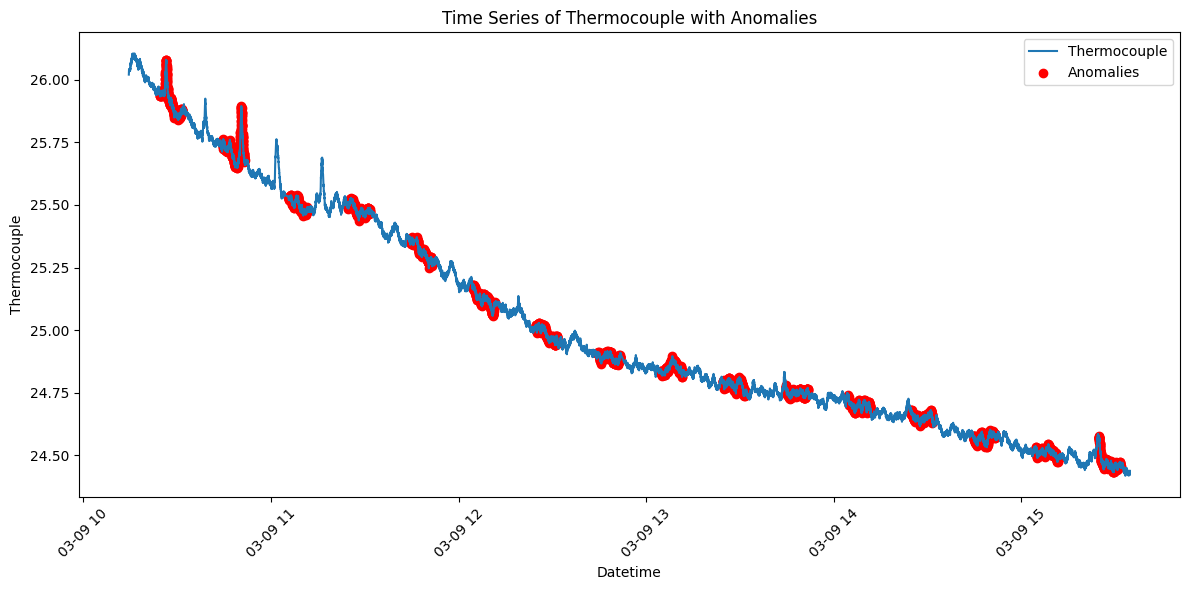

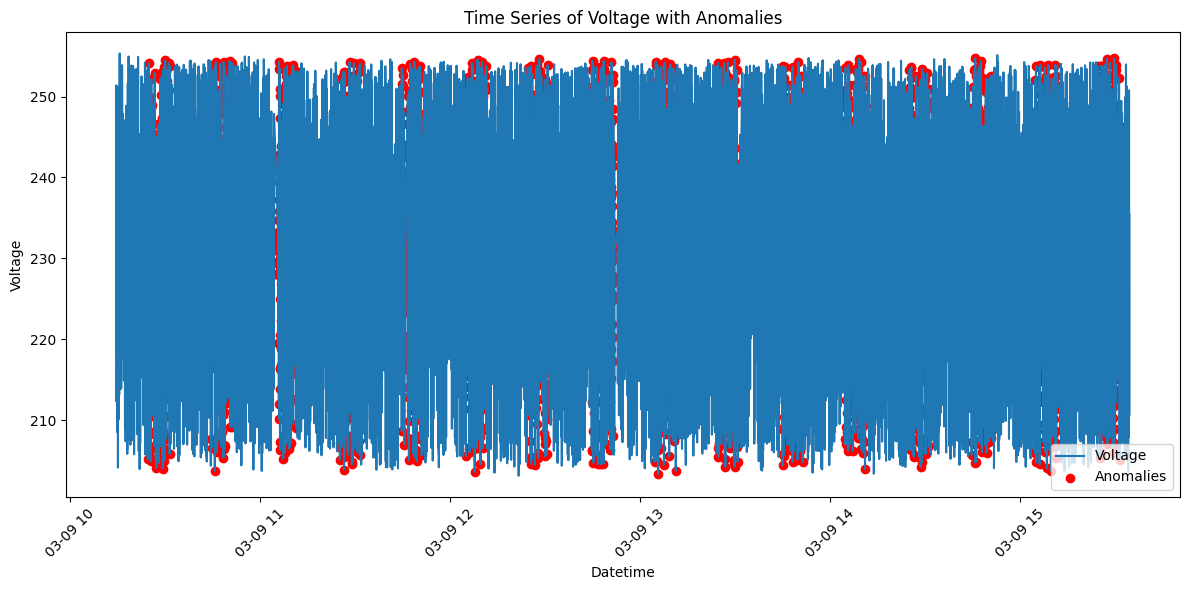

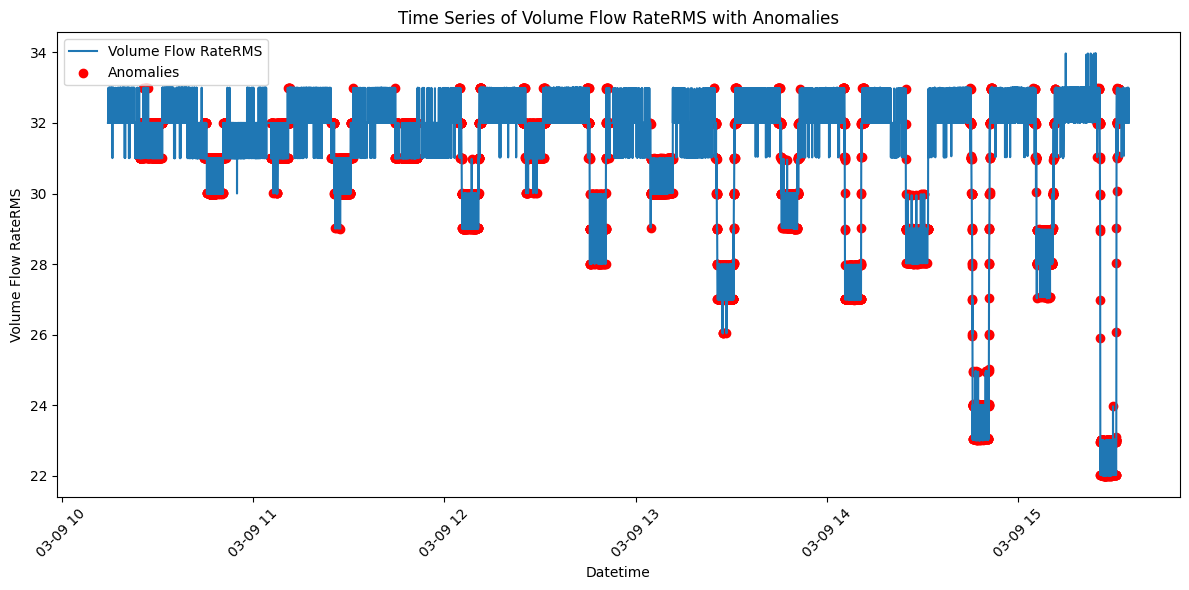

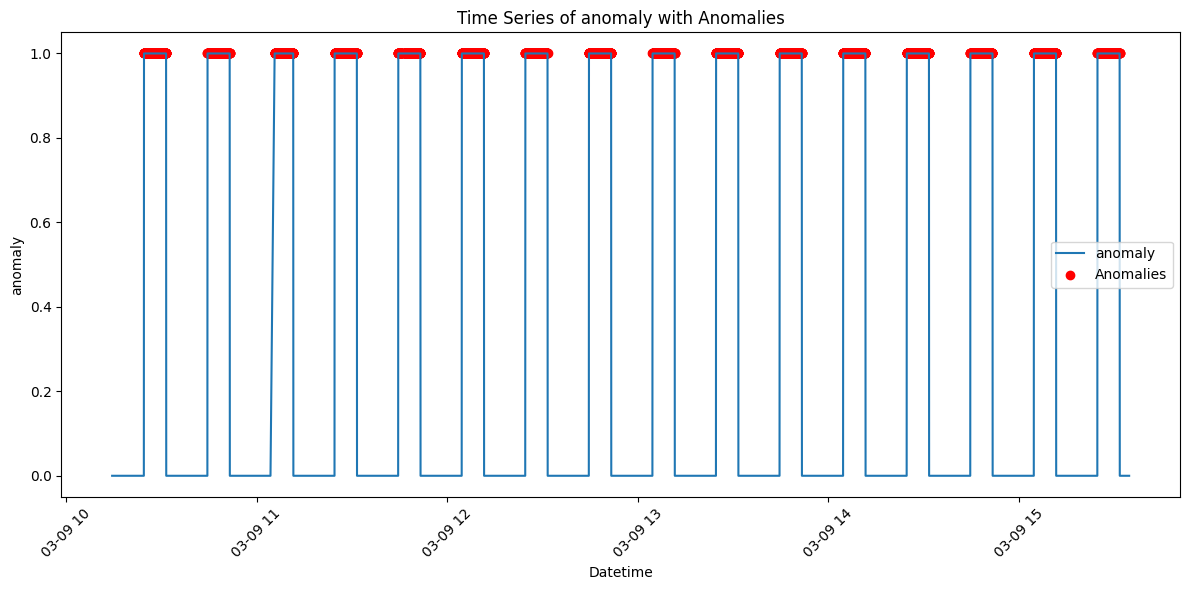

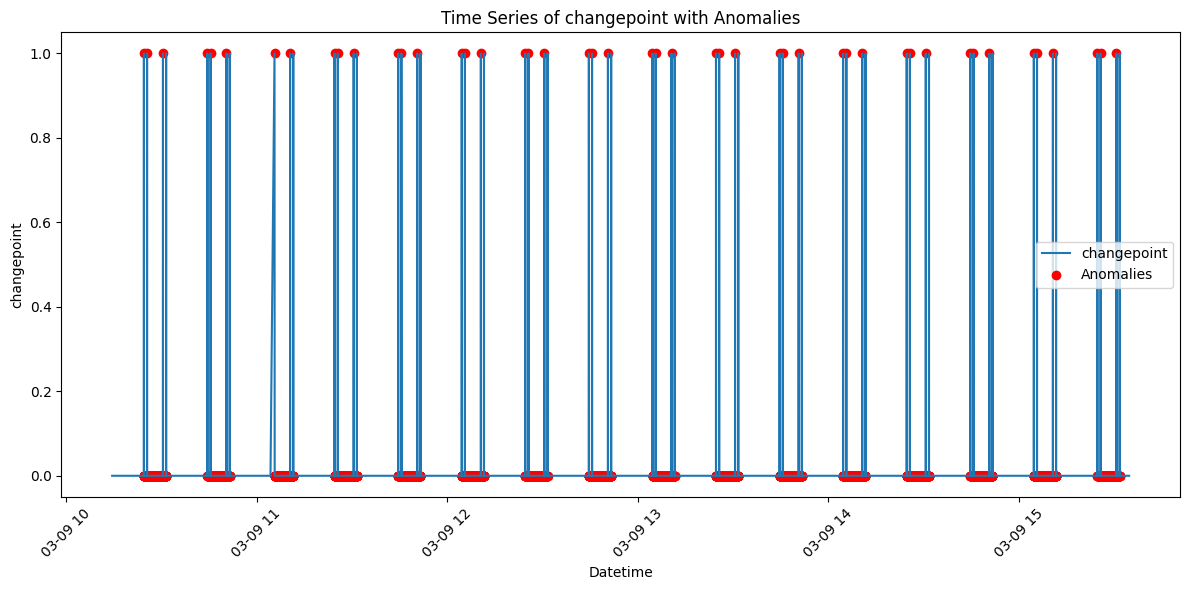

In [105]:
def plot_time_series_with_anomalies(df, date_column='datetime', anomaly_column='anomaly'):
    """Plots time series data with anomaly points highlighted."""

    # Ensure the date column is of datetime type
    df[date_column] = pd.to_datetime(df[date_column])
    df = df.set_index(date_column)


    numerical_cols = df.select_dtypes(include=np.number).columns

    for col in numerical_cols:
      plt.figure(figsize=(12, 6)) #adjust figure size if needed.
      plt.plot(df[col], label=col)

      #Highlight anomalies.  Assumes anomaly_column contains 1 for anomalies, 0 otherwise.
      anomalies = df[df[anomaly_column] == 1]
      plt.scatter(anomalies.index, anomalies[col], color='red', label='Anomalies')

      plt.xlabel('Datetime')
      plt.ylabel(col)
      plt.title(f'Time Series of {col} with Anomalies')
      plt.legend()
      plt.xticks(rotation=45)
      plt.tight_layout() # Adjusts subplot parameters for a tight layout.
      plt.show()

# Example usage (replace 'test' with your DataFrame name):

plot_time_series_with_anomalies(test_valve1)

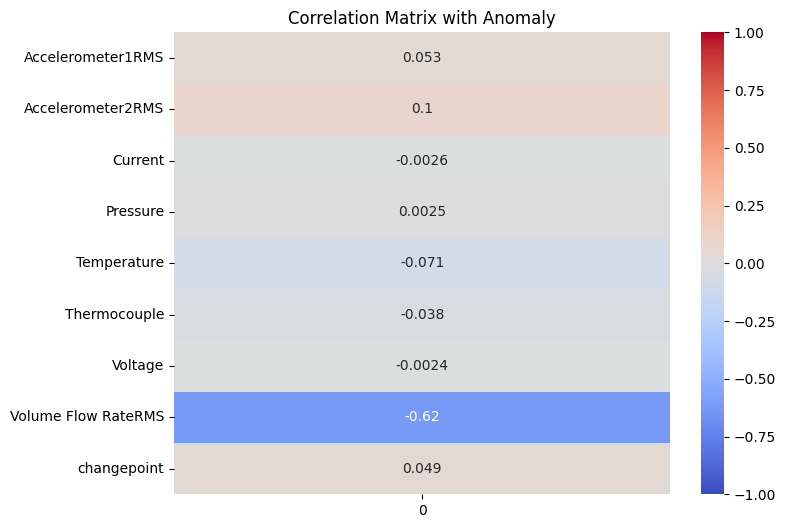

In [106]:
def plot_correlation_matrix(df, target_column='anomaly'):
    """Plots a correlation matrix of features with the target variable."""

    # Select numerical features (excluding the target column)
    numerical_features = df.select_dtypes(include=np.number).drop(columns=[target_column]).columns

    # Calculate the correlation matrix
    correlation_matrix = df[numerical_features].corrwith(df[target_column])

    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix with Anomaly')
    plt.show()


# Example usage:
plot_correlation_matrix(test_valve1)

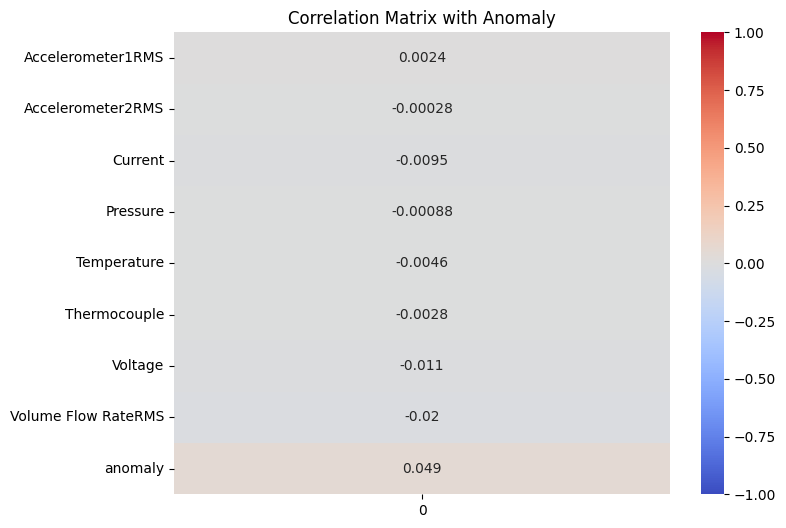

In [107]:
def plot_correlation_matrix(df, target_column='changepoint'):
    """Plots a correlation matrix of features with the target variable."""

    # Select numerical features (excluding the target column)
    numerical_features = df.select_dtypes(include=np.number).drop(columns=[target_column]).columns

    # Calculate the correlation matrix
    correlation_matrix = df[numerical_features].corrwith(df[target_column])

    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix with Anomaly')
    plt.show()


# Example usage:
plot_correlation_matrix(test_valve1)

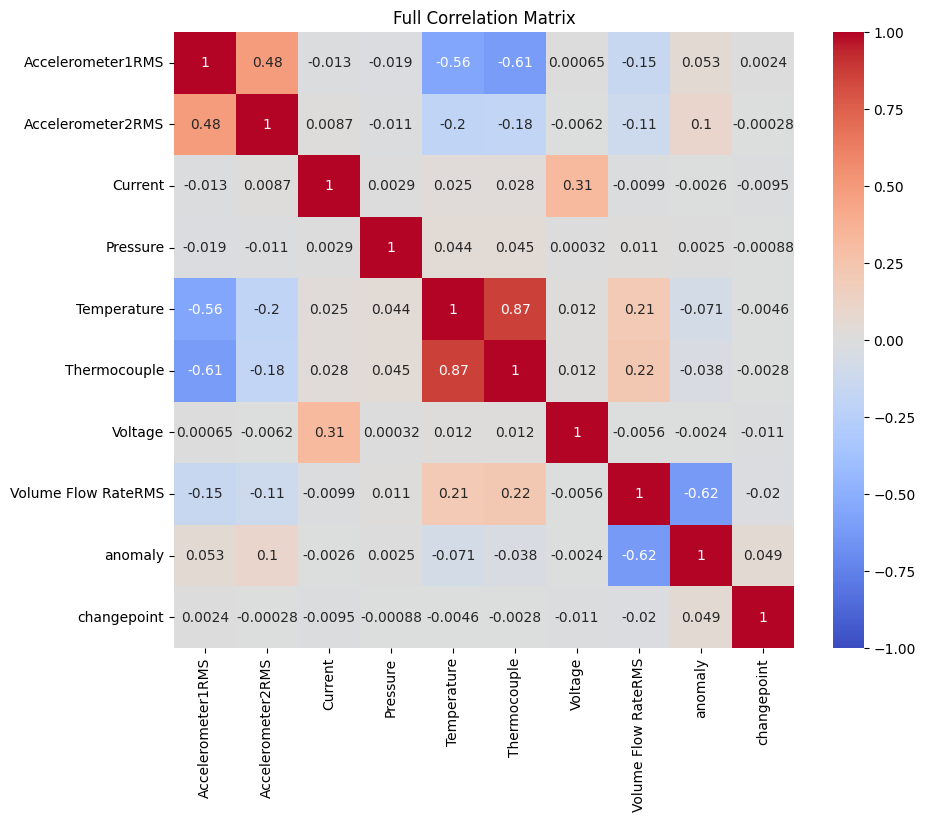

In [108]:
def plot_full_correlation_matrix(df):
    """Plots a full correlation matrix of all numerical features."""

    # Select numerical features
    numerical_features = df.select_dtypes(include=np.number).columns

    # Calculate the correlation matrix
    correlation_matrix = df[numerical_features].corr()

    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(10, 8))  # Adjust figure size as needed
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Full Correlation Matrix')
    plt.show()

# Example usage:
plot_full_correlation_matrix(test_valve1)

In [15]:
def combine_csv_files(directory, output_file="test_v2.csv"):
    """Combines multiple CSV files based on the 'datetime' column."""

    all_data = []
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            try:
                #MODIFIED: Read data with a semicolon separator:
                df = pd.read_csv(filepath, sep=';') # Note sep=';' - try this if your data is semi-colon separated

                #Crucial: Check for "datetime" column, otherwise, try alternative names
                if 'datetime' in df.columns:
                    #Crucial: Use 'coerce' to handle unrecognised formats
                    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
                elif 'Timestamp' in df.columns:
                     df['datetime'] = pd.to_datetime(df['Timestamp'], errors='coerce')
                elif 'Date' in df.columns:
                     df['datetime'] = pd.to_datetime(df['Date'], errors='coerce')
                else:
                  print(f"Error: No suitable datetime column found in {filename}. Make sure the column is named 'datetime', 'Timestamp', or 'Date' or specify the correct column name. ")
                  continue #Skip to next file if no suitable column found.

                #Crucial: Remove rows with any null values generated by conversion errors in datetime column:
                df.dropna(subset=['datetime'],inplace=True)
                all_data.append(df)
            except pd.errors.EmptyDataError:
                print(f"Skipping empty file: {filename}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")

    if not all_data:
        print("No valid CSV files found in the directory.")
        return

    combined_df = pd.concat(all_data, ignore_index=True)
    try:
      combined_df = combined_df.sort_values('datetime')
      combined_df = combined_df.reset_index(drop=True)
      combined_df.to_csv(output_file, index=False)
      print(f"Files combined successfully into {output_file}")

    except Exception as e:
      print(f"Error during combine and write to file: {e}")

# Example usage:
directory_path = '/content/valve2/'
combine_csv_files(directory_path)

Files combined successfully into test_v2.csv


In [103]:
test_valve2 = pd.read_csv('/content/test_v2.csv', delimiter= ',')

In [104]:
test_valve2

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 15:56:30,0.027608,0.039203,1.290480,0.054711,68.6194,24.3670,241.062,32.0362,0.0,0.0
1,2020-03-09 15:56:31,0.027166,0.039940,1.285650,0.382638,68.5923,24.3660,238.709,32.9649,0.0,0.0
2,2020-03-09 15:56:32,0.027718,0.040167,1.155880,0.054711,68.5207,24.3666,226.485,32.0362,0.0,0.0
3,2020-03-09 15:56:33,0.028045,0.038026,0.971268,0.382638,68.5425,24.3634,220.378,32.9649,0.0,0.0
4,2020-03-09 15:56:34,0.027644,0.038580,1.072460,-0.273216,68.6569,24.3639,233.922,32.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4307,2020-03-09 17:14:04,0.026853,0.038926,0.740614,0.054711,69.6371,24.1045,237.276,32.0451,0.0,0.0
4308,2020-03-09 17:14:05,0.027067,0.038430,0.988875,0.054711,69.6731,24.1046,230.729,32.9562,0.0,0.0
4309,2020-03-09 17:14:07,0.027582,0.038836,0.588439,0.054711,69.6959,24.1020,233.443,32.0000,0.0,0.0
4310,2020-03-09 17:14:08,0.027406,0.038133,0.989732,-0.273216,69.6293,24.1020,238.930,32.0000,0.0,0.0


In [112]:
test_valve2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             4312 non-null   object 
 1   Accelerometer1RMS    4312 non-null   float64
 2   Accelerometer2RMS    4312 non-null   float64
 3   Current              4312 non-null   float64
 4   Pressure             4312 non-null   float64
 5   Temperature          4312 non-null   float64
 6   Thermocouple         4312 non-null   float64
 7   Voltage              4312 non-null   float64
 8   Volume Flow RateRMS  4312 non-null   float64
 9   anomaly              4312 non-null   float64
 10  changepoint          4312 non-null   float64
dtypes: float64(10), object(1)
memory usage: 370.7+ KB


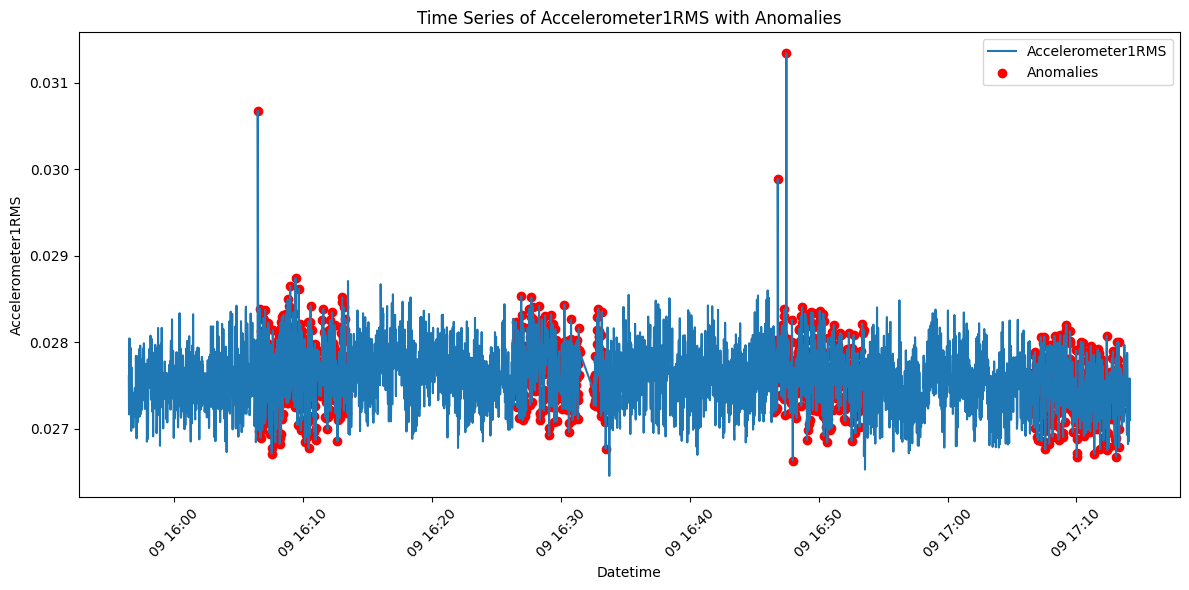

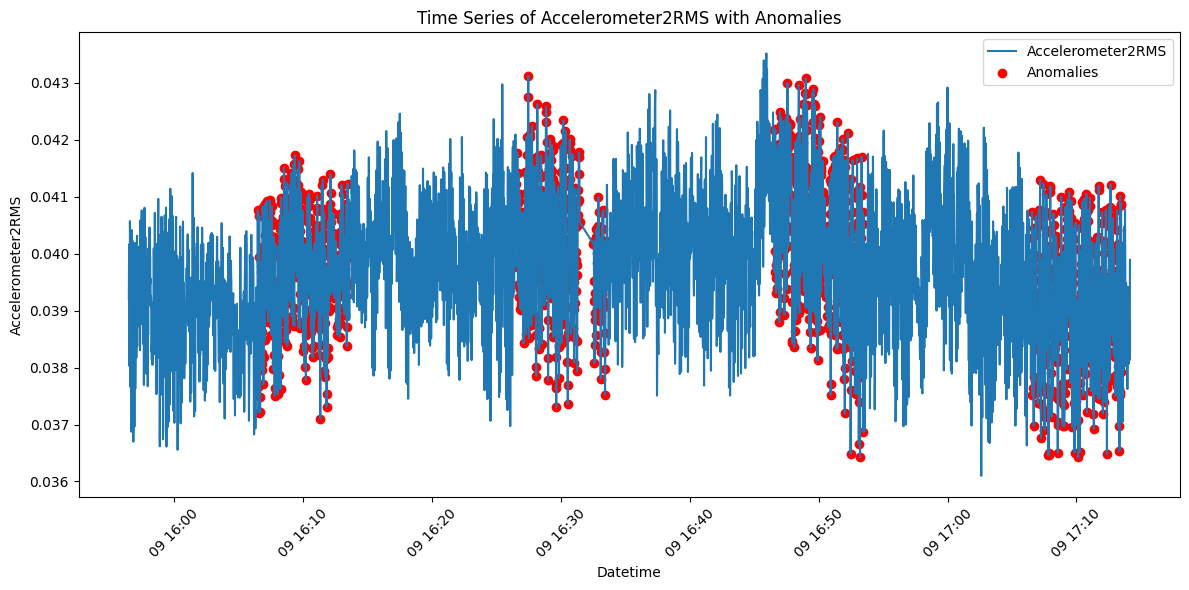

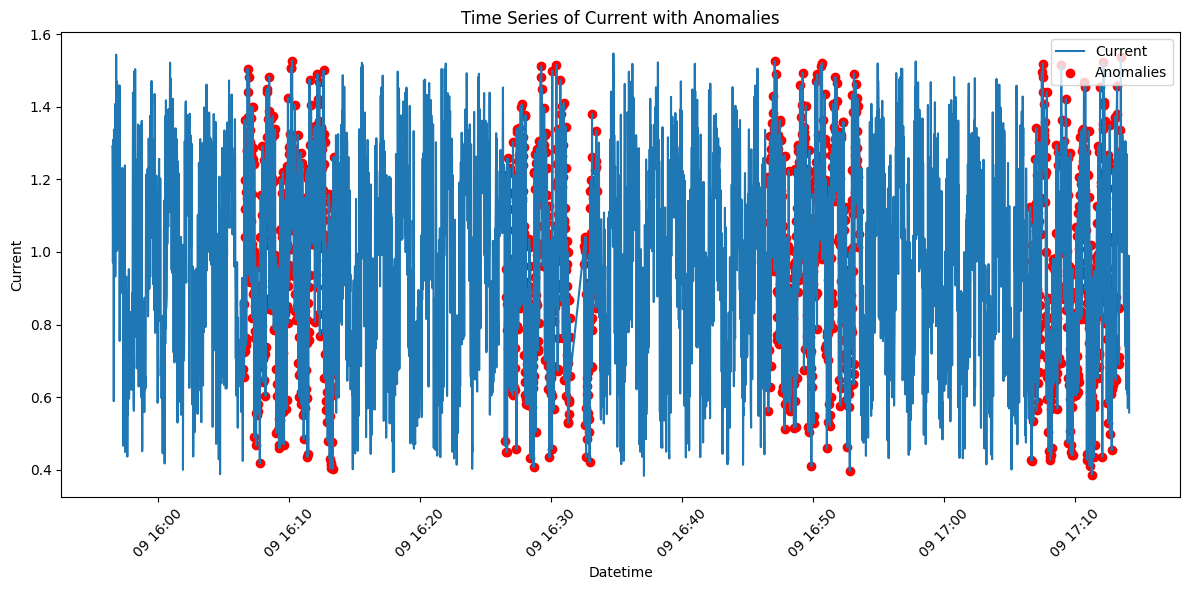

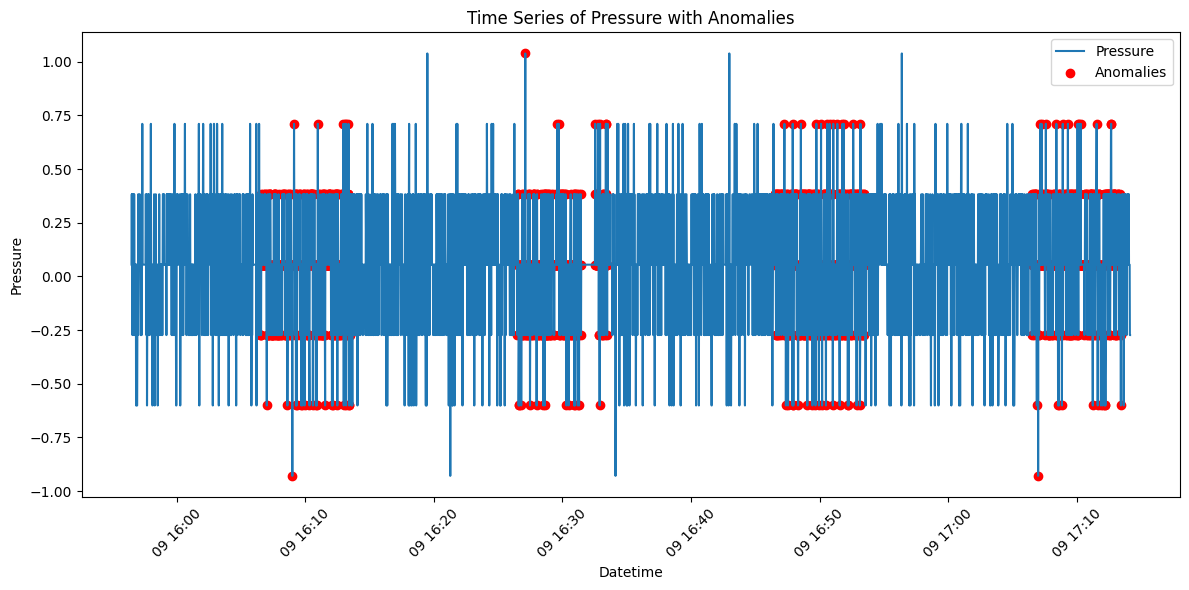

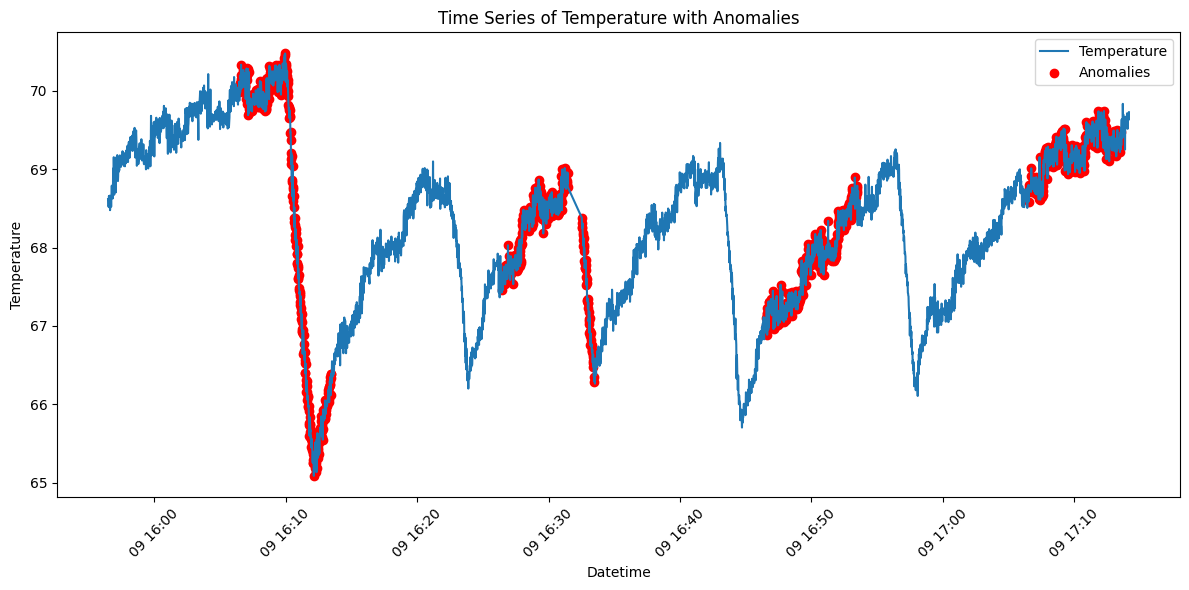

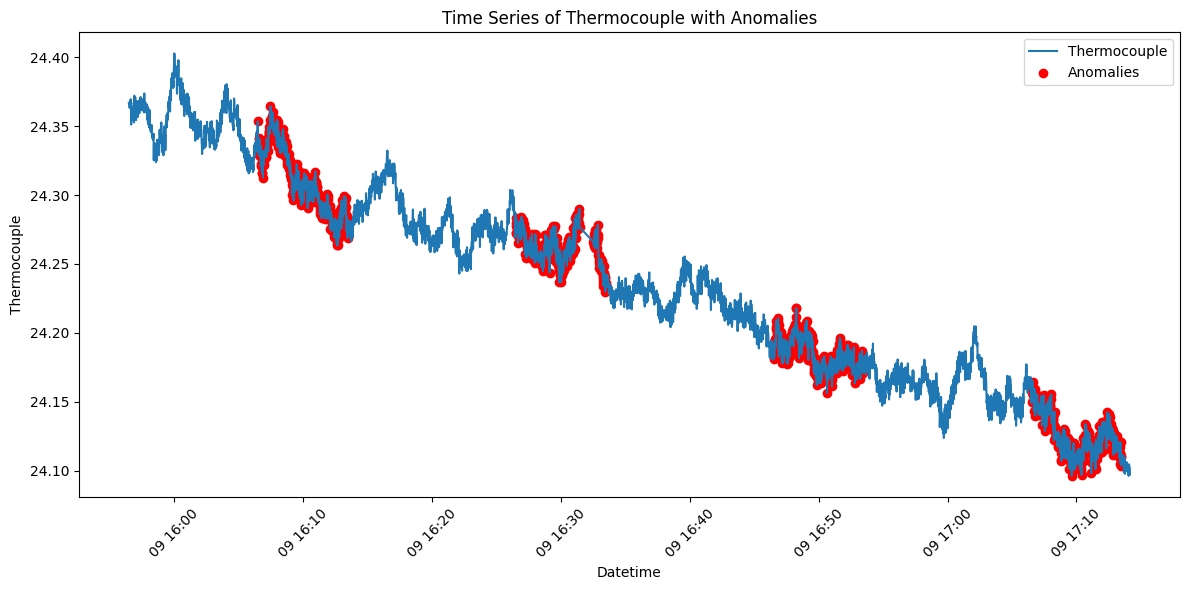

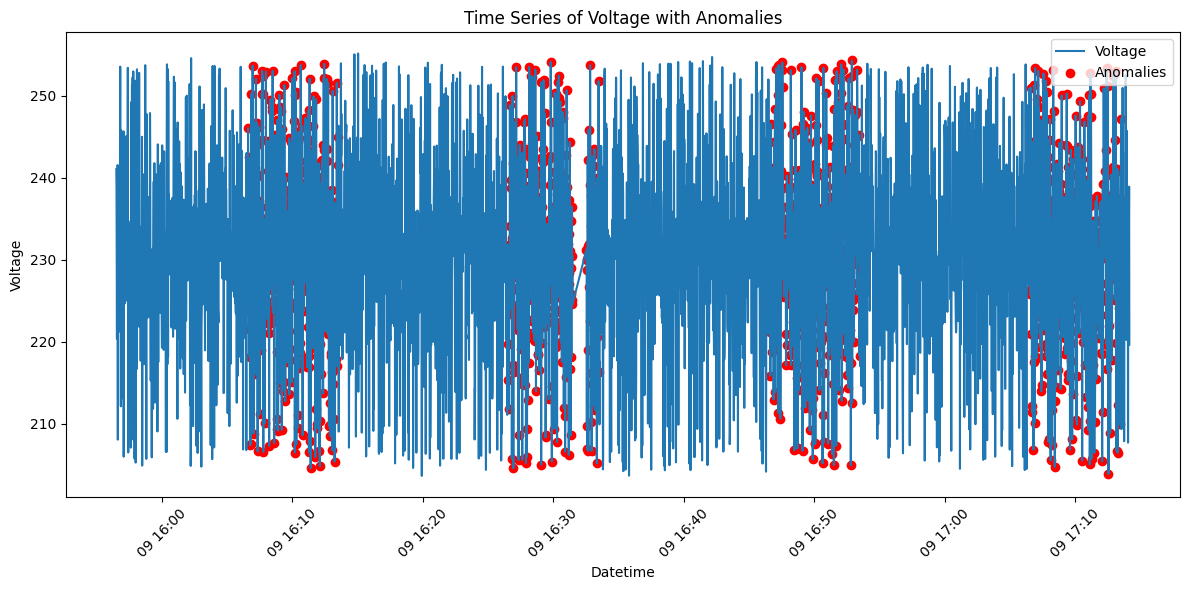

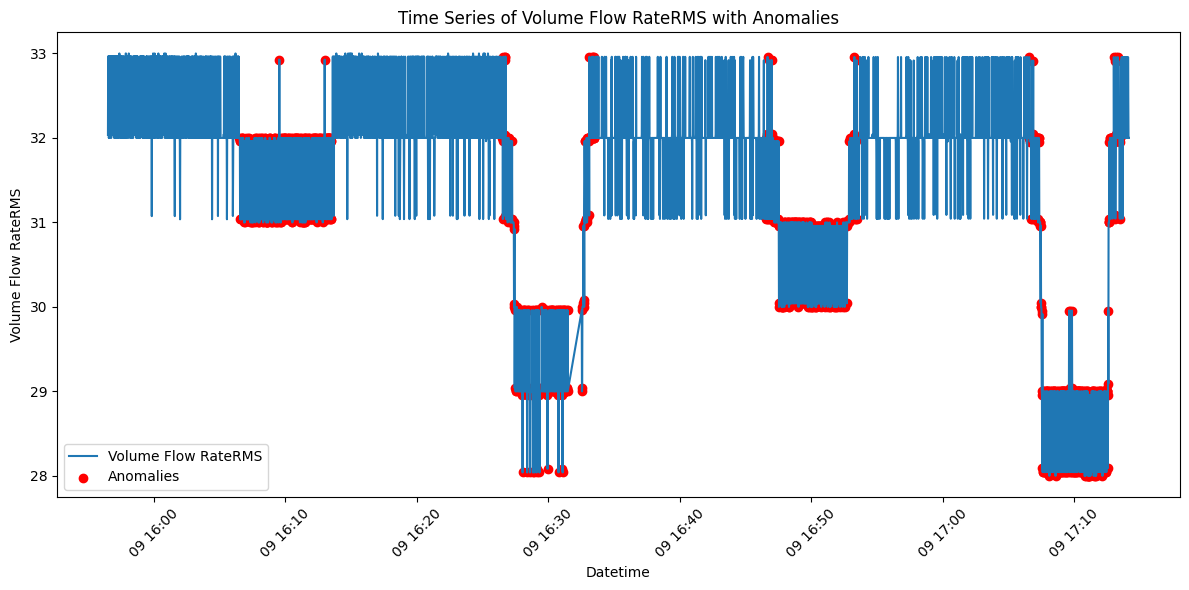

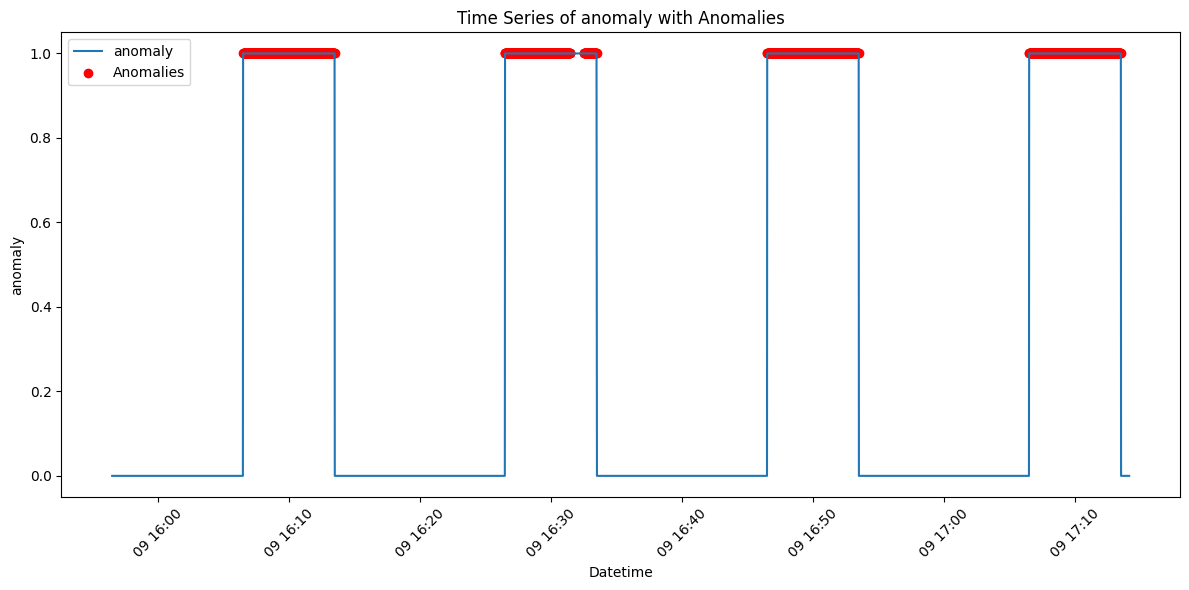

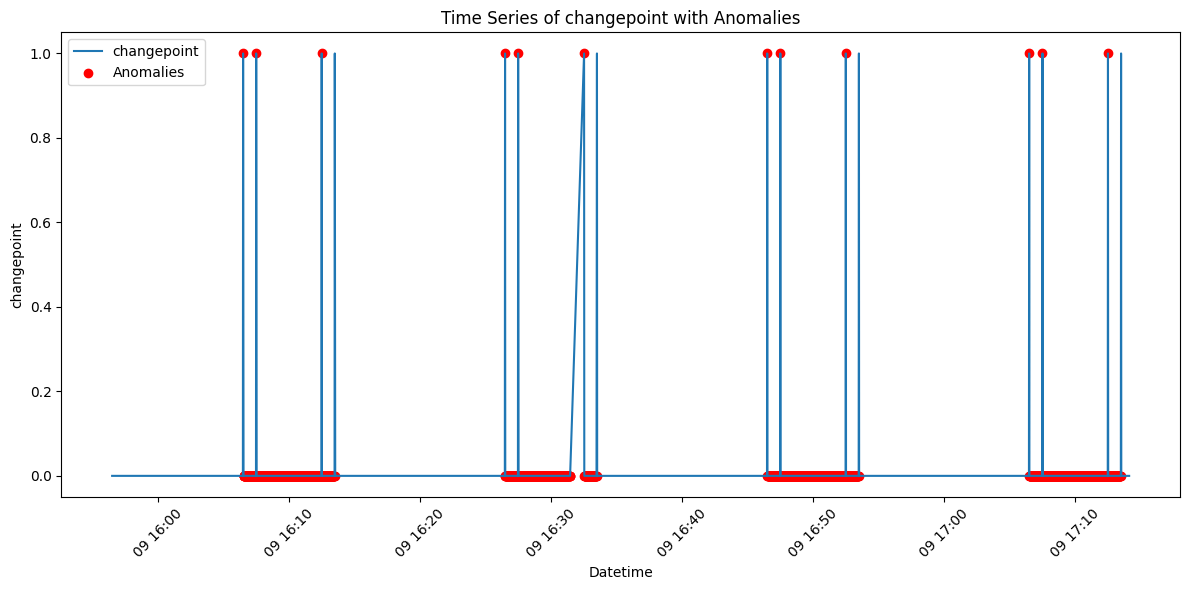

In [113]:
def plot_time_series_with_anomalies(df, date_column='datetime', anomaly_column='anomaly'):
    """Plots time series data with anomaly points highlighted."""

    # Ensure the date column is of datetime type
    df[date_column] = pd.to_datetime(df[date_column])
    df = df.set_index(date_column)


    numerical_cols = df.select_dtypes(include=np.number).columns

    for col in numerical_cols:
      plt.figure(figsize=(12, 6)) #adjust figure size if needed.
      plt.plot(df[col], label=col)

      #Highlight anomalies.  Assumes anomaly_column contains 1 for anomalies, 0 otherwise.
      anomalies = df[df[anomaly_column] == 1]
      plt.scatter(anomalies.index, anomalies[col], color='red', label='Anomalies')

      plt.xlabel('Datetime')
      plt.ylabel(col)
      plt.title(f'Time Series of {col} with Anomalies')
      plt.legend()
      plt.xticks(rotation=45)
      plt.tight_layout() # Adjusts subplot parameters for a tight layout.
      plt.show()

# Example usage (replace 'test' with your DataFrame name):

plot_time_series_with_anomalies(test_valve2)

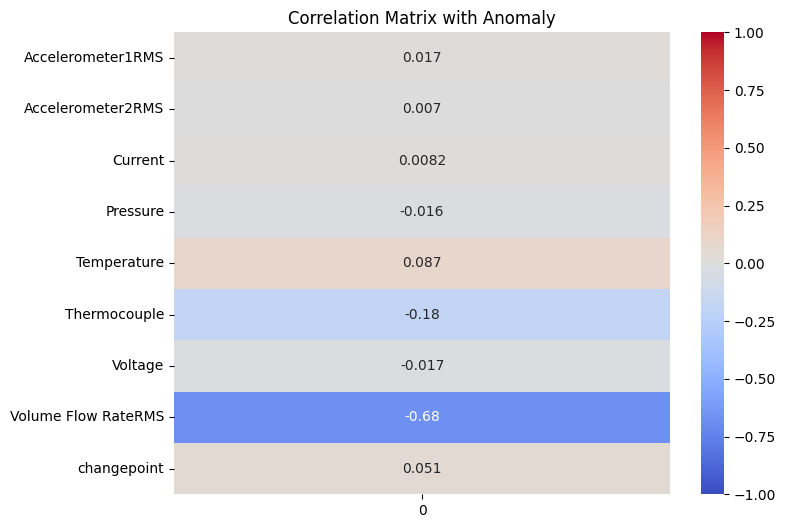

In [114]:
def plot_correlation_matrix(df, target_column='anomaly'):
    """Plots a correlation matrix of features with the target variable."""

    # Select numerical features (excluding the target column)
    numerical_features = df.select_dtypes(include=np.number).drop(columns=[target_column]).columns

    # Calculate the correlation matrix
    correlation_matrix = df[numerical_features].corrwith(df[target_column])

    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix with Anomaly')
    plt.show()


# Example usage:
plot_correlation_matrix(test_valve2)


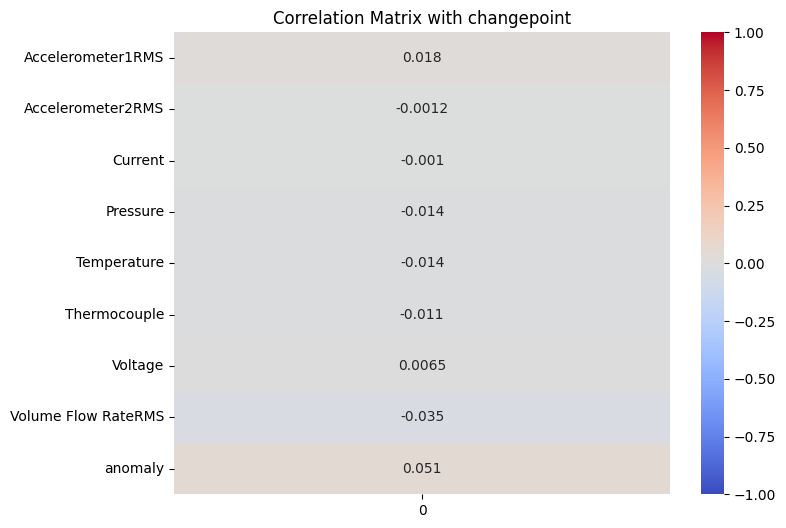

In [115]:
def plot_correlation_matrix(df, target_column='changepoint'):
    """Plots a correlation matrix of features with the target variable."""

    # Select numerical features (excluding the target column)
    numerical_features = df.select_dtypes(include=np.number).drop(columns=[target_column]).columns

    # Calculate the correlation matrix
    correlation_matrix = df[numerical_features].corrwith(df[target_column])

    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix with changepoint')
    plt.show()


# Example usage:
plot_correlation_matrix(test_valve2)

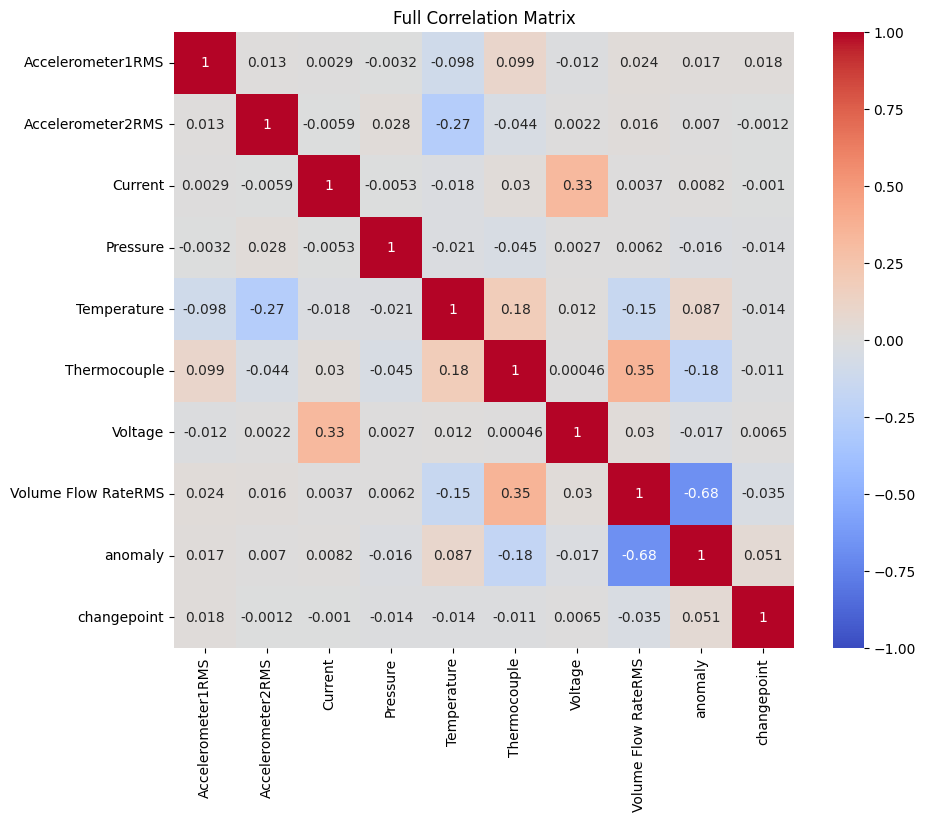

In [116]:
def plot_full_correlation_matrix(df):
    """Plots a full correlation matrix of all numerical features."""

    # Select numerical features
    numerical_features = df.select_dtypes(include=np.number).columns

    # Calculate the correlation matrix
    correlation_matrix = df[numerical_features].corr()

    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(10, 8))  # Adjust figure size as needed
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Full Correlation Matrix')
    plt.show()

# Example usage:
plot_full_correlation_matrix(test_valve2)



In [107]:
# Load data
train['datetime'] = pd.to_datetime(train['datetime'])
train = train.set_index('datetime')
test_valve1['datetime'] = pd.to_datetime(test_valve1['datetime'])
test_valve1 = test_valve1.set_index('datetime')

In [108]:
# Use all numeric columns except anomaly or changepoint as features
features = [col for col in test_valve1.columns if col not in ['anomaly', 'changepoint', 'datetime']]


In [109]:
# Scale features:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(train[features])
X_test_scaled = scaler.transform(test_valve1[features])
y_test = test_valve1['anomaly']
X_test_scaled = scaler.transform(test_valve1[features])
y_test = test_valve1['anomaly']

In [112]:
test_valve2['datetime'] = pd.to_datetime(test_valve2['datetime'])
test_valve2 = test_valve2.set_index('datetime')

In [113]:
# Use all numeric columns except anomaly or changepoint as features
features = [col for col in test_valve2.columns if col not in ['anomaly', 'changepoint', 'datetime']]

In [114]:
# Scale features:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(train[features])
X_test_scaled = scaler.transform(test_valve2[features])
y_test = test_valve2['anomaly']
X_test_scaled = scaler.transform(test_valve2[features])
y_test = test_valve2['anomaly']

## 1. Proximity-Based: LocalOutlierFactor

### 1.1 test_valve1

In [110]:

lof = LocalOutlierFactor(n_neighbors=10, contamination='auto')
y_pred_lof = lof.fit_predict(X_test_scaled)

# Convert LOF predictions to binary (1 for normal, -1 for anomaly) to get the same format as y_test:
y_pred_lof_binary = np.where(y_pred_lof == -1, 1, 0)


# Evaluate LOF
f1_lof = f1_score(y_test, y_pred_lof_binary)
precision_lof = precision_score(y_test, y_pred_lof_binary)
recall_lof = recall_score(y_test, y_pred_lof_binary)

print("KNN (Local Outlier Factor) Results:")
print(f"  F1 Score: {f1_lof:.4f}")
print(f"  Precision: {precision_lof:.4f}")
print(f"  Recall: {recall_lof:.4f}")

KNN (Local Outlier Factor) Results:
  F1 Score: 0.0109
  Precision: 0.3182
  Recall: 0.0055


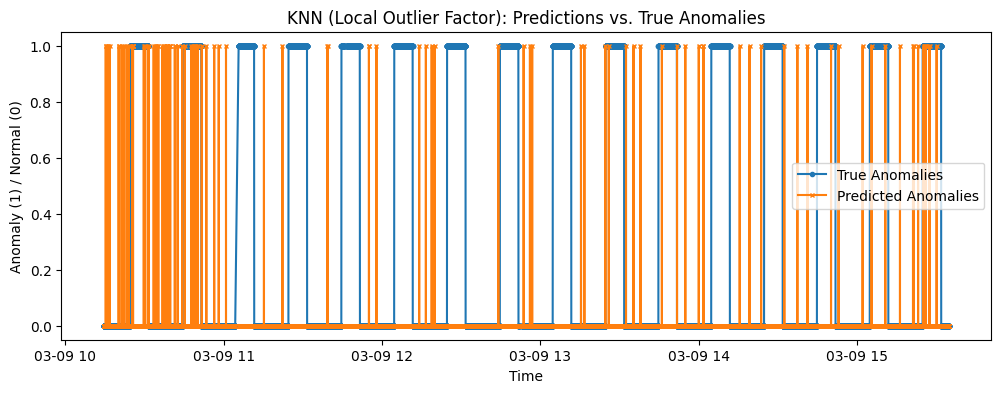

In [111]:
# Plot predictions vs true anomalies
plt.figure(figsize=(12, 4))
plt.plot(test_valve1.index, y_test, label='True Anomalies', marker='o', linestyle='-', markersize=3) #Plot the true anomalies
plt.plot(test_valve1.index, y_pred_lof_binary, label='Predicted Anomalies', marker='x', linestyle='-', markersize=3) #Plot the predicted anomalies
plt.title("KNN (Local Outlier Factor): Predictions vs. True Anomalies")
plt.xlabel("Time")
plt.ylabel("Anomaly (1) / Normal (0)")
plt.legend()
plt.show()

### 1.2 test_valve2

In [115]:

lof = LocalOutlierFactor(n_neighbors=10, contamination='auto')
y_pred_lof = lof.fit_predict(X_test_scaled)

# Convert LOF predictions to binary (1 for normal, -1 for anomaly) to get the same format as y_test:
y_pred_lof_binary = np.where(y_pred_lof == -1, 1, 0)


# Evaluate LOF
f1_lof = f1_score(y_test, y_pred_lof_binary)
precision_lof = precision_score(y_test, y_pred_lof_binary)
recall_lof = recall_score(y_test, y_pred_lof_binary)

print("KNN (Local Outlier Factor) Results:")
print(f"  F1 Score: {f1_lof:.4f}")
print(f"  Precision: {precision_lof:.4f}")
print(f"  Recall: {recall_lof:.4f}")

KNN (Local Outlier Factor) Results:
  F1 Score: 0.0144
  Precision: 0.7333
  Recall: 0.0073


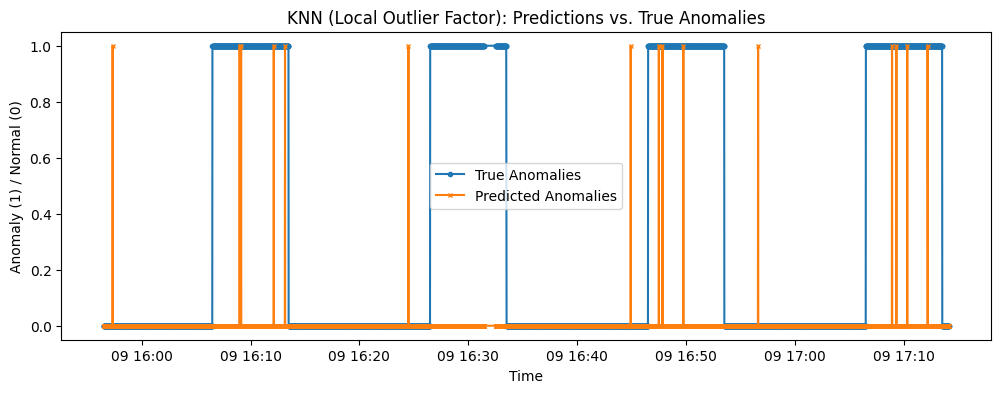

In [116]:
# Plot predictions vs true anomalies
plt.figure(figsize=(12, 4))
plt.plot(test_valve2.index, y_test, label='True Anomalies', marker='o', linestyle='-', markersize=3) #Plot the true anomalies
plt.plot(test_valve2.index, y_pred_lof_binary, label='Predicted Anomalies', marker='x', linestyle='-', markersize=3) #Plot the predicted anomalies
plt.title("KNN (Local Outlier Factor): Predictions vs. True Anomalies")
plt.xlabel("Time")
plt.ylabel("Anomaly (1) / Normal (0)")
plt.legend()
plt.show()

## 2. Prediction-Based: Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import numpy as np

# Разделение данных для метода предсказания (вам нужен целевой y)
X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(X_train_scaled, train.index, test_size=0.2, random_state=42)

# Создание случайной целевой классификации для обучающих данных:
y_train_rf = np.random.randint(0, 2, size=len(X_train_rf))

# Классификатор случайного леса с заданной глубиной дерева
max_depth_value = 10
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=max_depth_value, random_state=42)

# Обучение на обучающих данных
rf_classifier.fit(X_train_rf, y_train_rf)

# Прогнозирование вероятностей класса 1
y_pred_rf_prob = rf_classifier.predict_proba(X_test_scaled)[:, 1]
threshold_rf = np.percentile(y_pred_rf_prob, 95)
y_pred_rf_binary = (y_pred_rf_prob > threshold_rf).astype(int)

# Оценка случайного леса
f1_rf = f1_score(y_test, y_pred_rf_binary)
precision_rf = precision_score(y_test, y_pred_rf_binary)
recall_rf = recall_score(y_test, y_pred_rf_binary)

# Вывод результатов
print("\nRandom Forest Results:")
print(f"  F1 Score: {f1_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")



Random Forest Results:
  F1 Score: 0.0775
  Precision: 0.3302
  Recall: 0.0439


### 2.1 test_valve1

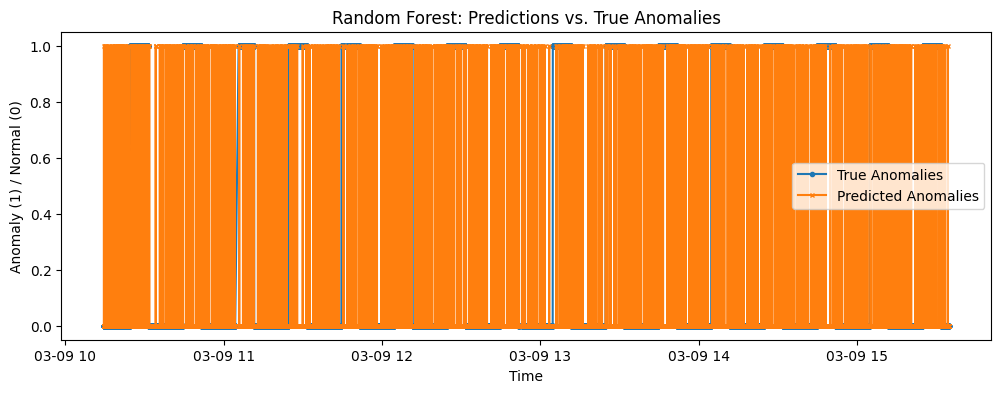

In [41]:
# Plot predictions vs true anomalies
plt.figure(figsize=(12, 4))
plt.plot(test_valve1.index, y_test, label='True Anomalies', marker='o', linestyle='-', markersize=3) #Plot the true anomalies
plt.plot(test_valve1.index, y_pred_rf_binary, label='Predicted Anomalies', marker='x', linestyle='-', markersize=3) #Plot the predicted anomalies
plt.title("Random Forest: Predictions vs. True Anomalies")
plt.xlabel("Time")
plt.ylabel("Anomaly (1) / Normal (0)")
plt.legend()
plt.show()

### 2.2 test_valve2

In [157]:
# Split data for prediction based method (you need a target)
X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(X_train_scaled, train.index, test_size=0.2, random_state=42)
# Create a random classifciation based target for the training data:
y_train_rf = np.random.randint(0, 2, size=len(X_train_rf))


#Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=90, random_state=42) #Fit to the training data only
rf_classifier.fit(X_train_rf, y_train_rf) #Training data


y_pred_rf_prob = rf_classifier.predict_proba(X_test_scaled)[:, 1] #probability of class 1
threshold_rf = np.percentile(y_pred_rf_prob, 95)
y_pred_rf_binary = (y_pred_rf_prob > threshold_rf).astype(int)



# Evaluate Random Forest
f1_rf = f1_score(y_test, y_pred_rf_binary)
precision_rf = precision_score(y_test, y_pred_rf_binary)
recall_rf = recall_score(y_test, y_pred_rf_binary)


print("\nRandom Forest Results:")
print(f"  F1 Score: {f1_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")


Random Forest Results:
  F1 Score: 0.0758
  Precision: 0.3283
  Recall: 0.0428


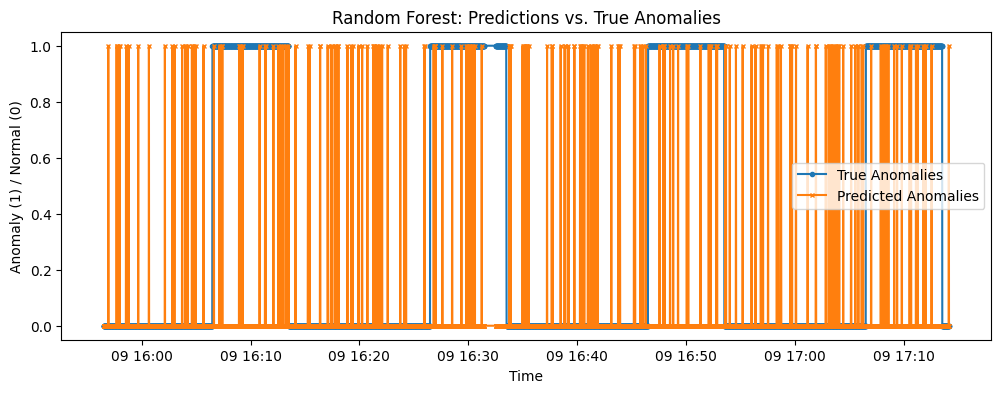

In [158]:
# Plot predictions vs true anomalies
plt.figure(figsize=(12, 4))
plt.plot(test_valve2.index, y_test, label='True Anomalies', marker='o', linestyle='-', markersize=3) #Plot the true anomalies
plt.plot(test_valve2.index, y_pred_rf_binary, label='Predicted Anomalies', marker='x', linestyle='-', markersize=3) #Plot the predicted anomalies
plt.title("Random Forest: Predictions vs. True Anomalies")
plt.xlabel("Time")
plt.ylabel("Anomaly (1) / Normal (0)")
plt.legend()
plt.show()

## 3. Reconstruction-Based: Convolutional Autoencoder

In [44]:
# Crucial: The data shape needs to be consistent.
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])  # Correct shape
latent_dim = 3

# Define the Convolutional Autoencoder (corrected)
conv_autoencoder = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv1D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2, padding='same'),
    layers.Conv1D(16, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2, padding='same'),
    layers.Flatten(),
    layers.Dense(latent_dim, activation='tanh'),
    layers.Dense(np.prod(input_shape), activation='linear'),  # Correct output shape
    layers.Reshape(input_shape)  # Reshape back to original
])

conv_autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder (reduced epochs, critical!)
conv_autoencoder.fit(X_train_reshaped, X_train_reshaped, epochs=20, batch_size=16, verbose=0)  # Significantly fewer epochs

# Reconstruct the data (corrected)
X_test_reconstructed = conv_autoencoder.predict(X_test_reshaped)
# Calculate reconstruction error (MSE)
mse = np.mean(np.square(X_test_reshaped - X_test_reconstructed), axis=(1, 2))

# Set threshold
threshold = np.percentile(mse, 95)

#Detect anomaly using the threshold on reconstruction error
y_pred_ae_binary = (mse > threshold).astype(int)


# Evaluate Convolutional Autoencoder
f1_ae = f1_score(y_test, y_pred_ae_binary)
precision_ae = precision_score(y_test, y_pred_ae_binary)
recall_ae = recall_score(y_test, y_pred_ae_binary)

print("\nConvolutional Autoencoder Results:")
print(f"  F1 Score: {f1_ae:.4f}")
print(f"  Precision: {precision_ae:.4f}")
print(f"  Recall: {recall_ae:.4f}")

568/568 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Convolutional Autoencoder Results:
  F1 Score: 0.2322
  Precision: 0.9229
  Recall: 0.1328


###3.1 test_valve1

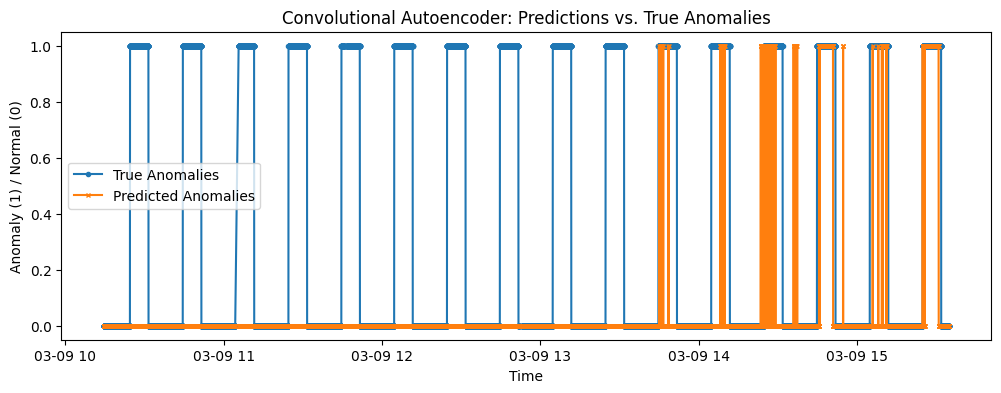

In [45]:
# Plot CAE predictions vs true anomalies
plt.figure(figsize=(12, 4))
plt.plot(test_valve1.index, y_test, label='True Anomalies', marker='o', linestyle='-', markersize=3) #Plot the true anomalies
plt.plot(test_valve1.index, y_pred_ae_binary, label='Predicted Anomalies', marker='x', linestyle='-', markersize=3) #Plot the predicted anomalies
plt.title("Convolutional Autoencoder: Predictions vs. True Anomalies")
plt.xlabel("Time")
plt.ylabel("Anomaly (1) / Normal (0)")
plt.legend()
plt.show()

### 3.2 test_valve2

In [169]:
# Crucial: The data shape needs to be consistent.
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])  # Correct shape
latent_dim = 3

# Define the Convolutional Autoencoder (corrected)
conv_autoencoder = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv1D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2, padding='same'),
    layers.Conv1D(16, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2, padding='same'),
    layers.Flatten(),
    layers.Dense(latent_dim, activation='tanh'),
    layers.Dense(np.prod(input_shape), activation='linear'),  # Correct output shape
    layers.Reshape(input_shape)  # Reshape back to original
])

conv_autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder (reduced epochs, critical!)
conv_autoencoder.fit(X_train_reshaped, X_train_reshaped, epochs=15, batch_size=32, verbose=0)  # Significantly fewer epochs

# Reconstruct the data (corrected)
X_test_reconstructed = conv_autoencoder.predict(X_test_reshaped)
# Calculate reconstruction error (MSE)
mse = np.mean(np.square(X_test_reshaped - X_test_reconstructed), axis=(1, 2))

# Set threshold
threshold = np.percentile(mse, 95)

#Detect anomaly using the threshold on reconstruction error
y_pred_ae_binary = (mse > threshold).astype(int)


# Evaluate Convolutional Autoencoder
f1_ae = f1_score(y_test, y_pred_ae_binary)
precision_ae = precision_score(y_test, y_pred_ae_binary)
recall_ae = recall_score(y_test, y_pred_ae_binary)

print("\nConvolutional Autoencoder Results:")
print(f"  F1 Score: {f1_ae:.4f}")
print(f"  Precision: {precision_ae:.4f}")
print(f"  Recall: {recall_ae:.4f}")

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Convolutional Autoencoder Results:
  F1 Score: 0.1696
  Precision: 0.6806
  Recall: 0.0969


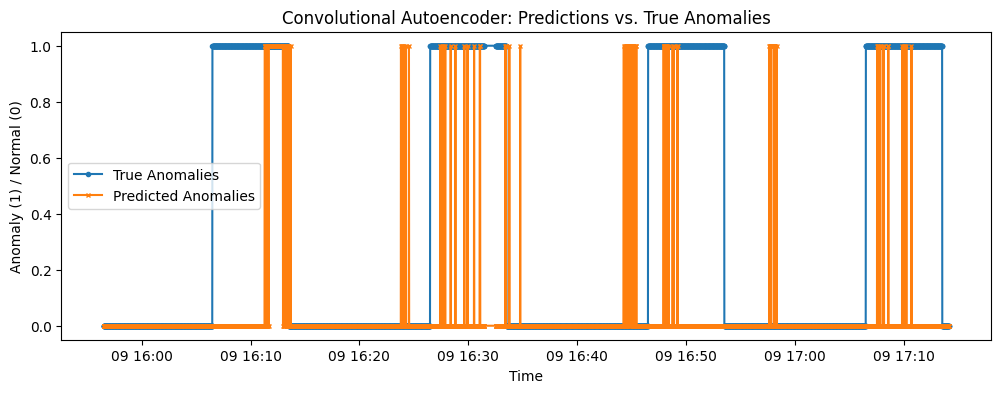

In [171]:
# Plot CAE predictions vs true anomalies
plt.figure(figsize=(12, 4))
plt.plot(test_valve2.index, y_test, label='True Anomalies', marker='o', linestyle='-', markersize=3) #Plot the true anomalies
plt.plot(test_valve2.index, y_pred_ae_binary, label='Predicted Anomalies', marker='x', linestyle='-', markersize=3) #Plot the predicted anomalies
plt.title("Convolutional Autoencoder: Predictions vs. True Anomalies")
plt.xlabel("Time")
plt.ylabel("Anomaly (1) / Normal (0)")
plt.legend()
plt.show()

## 4. Unsupervised Quality Assessment (Without Real Target)


Unsupervised quality assessment

 LOF Anomaly Scores:
   Min Anomaly Score: -1.9463
   Max Anomaly Score: -0.9337


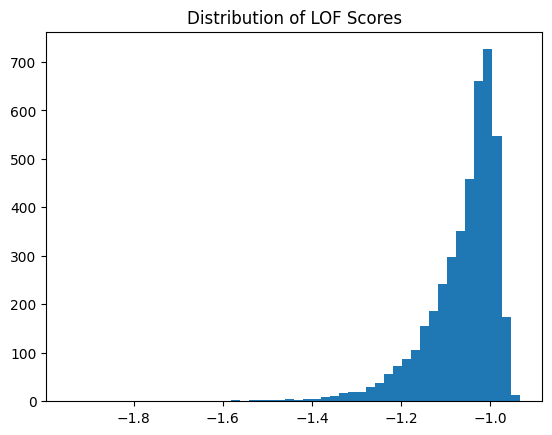


Random Forest Prediction Probabilities (for class 1):
   Min Prediction probability: 0.6129
   Max Prediction probability: 0.7725


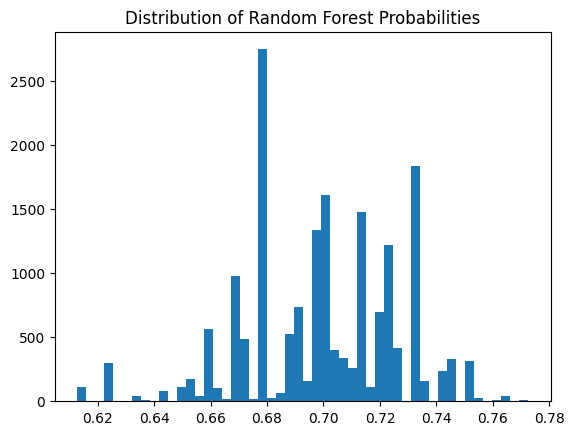


 Convolutional Autoencoder Reconstruction Errors (MSE)
   Min MSE: 537.6250
   Max MSE: 668.9337


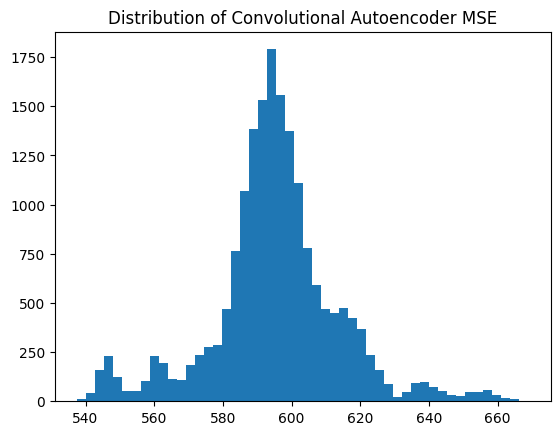


Finished


In [120]:
#Unsupervised assessment of anomaly scores. We can evaluate by examining the distribution of each of the scores:
print("\nUnsupervised quality assessment")

print("\n LOF Anomaly Scores:")
print(f"   Min Anomaly Score: {min(lof.negative_outlier_factor_):.4f}")
print(f"   Max Anomaly Score: {max(lof.negative_outlier_factor_):.4f}")
plt.hist(lof.negative_outlier_factor_, bins=50)
plt.title("Distribution of LOF Scores")
plt.show()


print("\nRandom Forest Prediction Probabilities (for class 1):")
print(f"   Min Prediction probability: {min(y_pred_rf_prob):.4f}")
print(f"   Max Prediction probability: {max(y_pred_rf_prob):.4f}")
plt.hist(y_pred_rf_prob, bins=50)
plt.title("Distribution of Random Forest Probabilities")
plt.show()


print("\n Convolutional Autoencoder Reconstruction Errors (MSE)")
print(f"   Min MSE: {min(mse):.4f}")
print(f"   Max MSE: {max(mse):.4f}")
plt.hist(mse, bins=50)
plt.title("Distribution of Convolutional Autoencoder MSE")
plt.show()

print("\nFinished")

## 5. Reconstruction-Based: Vanilla Autoencoder

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3.7885 - val_loss: 0.7941
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8472 - val_loss: 0.7796
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1555 - val_loss: 0.7586
Epoch 4/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9087 - val_loss: 0.7399
Epoch 5/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7717 - val_loss: 0.7038
Epoch 6/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7510 - val_loss: 0.6839
Epoch 7/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6966 - val_loss: 0.6721
Epoch 8/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6841 - val_loss: 0.6606
Epoch 9/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6721 - val_loss: 0.6532
Epoch 10/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6620 - val_loss: 0.6517
Epoch 11/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6642 - val_loss: 0.6481
Epoch 12/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6517 - val_lo

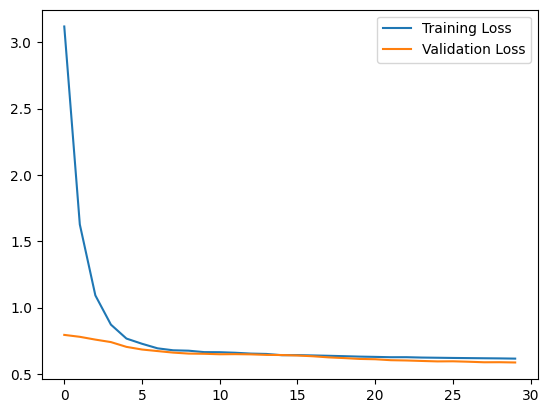

568/568 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


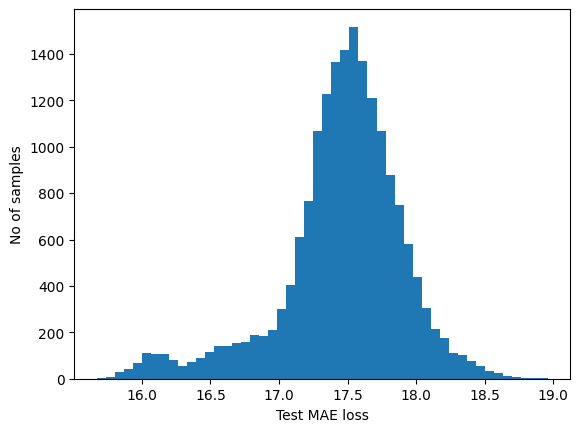

Reconstruction error threshold:  18.083872208309298

Vanilla Autoencoder Results:
  F1 Score: 0.2090
  Precision: 0.8304
  Recall: 0.1195


In [46]:
model = tf.keras.Sequential(
    [
        layers.Dense(8),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(0.2),

        layers.Dense(4),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(0.2),

        layers.Dense(2, activation="linear"),

        layers.Dense(4),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(0.2),

        layers.Dense(8),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(0.2),
        layers.Dense(1, activation="linear")
    ]
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()
history = model.fit(
    X_train_scaled,
    X_train_scaled,
    epochs=30,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

# Predict on the TEST data, not training data
X_test_pred = model.predict(X_test_scaled)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test_scaled), axis=1)


plt.hist(test_mae_loss, bins=50)
plt.xlabel("Test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.  Consider using a percentile for robustness.
threshold = np.percentile(test_mae_loss, 95) # Example percentile, adjust as needed.
print("Reconstruction error threshold: ", threshold)

#Detect anomaly using the threshold on reconstruction error
y_pred_ae_binary = (test_mae_loss > threshold).astype(int)

# Evaluate the model using test data
f1_ae = f1_score(y_test, y_pred_ae_binary)
precision_ae = precision_score(y_test, y_pred_ae_binary)
recall_ae = recall_score(y_test, y_pred_ae_binary)

print("\nVanilla Autoencoder Results:")
print(f"  F1 Score: {f1_ae:.4f}")
print(f"  Precision: {precision_ae:.4f}")
print(f"  Recall: {recall_ae:.4f}")

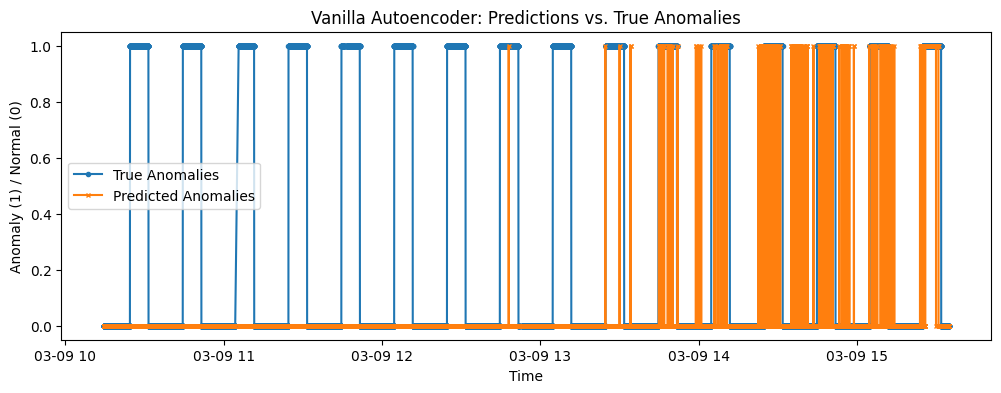

In [47]:
# Plot CAE predictions vs true anomalies (Corrected)
plt.figure(figsize=(12, 4))
plt.plot(test_valve1.index, y_test, label='True Anomalies', marker='o', linestyle='-', markersize=3)  # Plot the true anomalies
plt.plot(test_valve1.index, y_pred_ae_binary, label='Predicted Anomalies', marker='x', linestyle='-', markersize=3)  # Plot the predicted anomalies.  Using binary predictions here!
plt.title("Vanilla Autoencoder: Predictions vs. True Anomalies")
plt.xlabel("Time")
plt.ylabel("Anomaly (1) / Normal (0)")
plt.legend()
plt.show()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.3464 - val_loss: 0.6029
Epoch 2/40
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7060 - val_loss: 0.6085
Epoch 3/40
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6561 - val_loss: 0.6068
Epoch 4/40
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6386 - val_loss: 0.5994
Epoch 5/40
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6229 - val_loss: 0.5919
Epoch 6/40
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6121 - val_loss: 0.5875
Epoch 7/40
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6008 - val_loss: 0.5822
Epoch 8/40
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6048 - val_loss: 0.5764
Epoch 9/40
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6015 - val_loss: 0.5738
Epoch 10/40
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5960 - val_loss: 0.5704
Epoch 11/40
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5942 - val_loss: 0.5692
Epoch 12/40
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

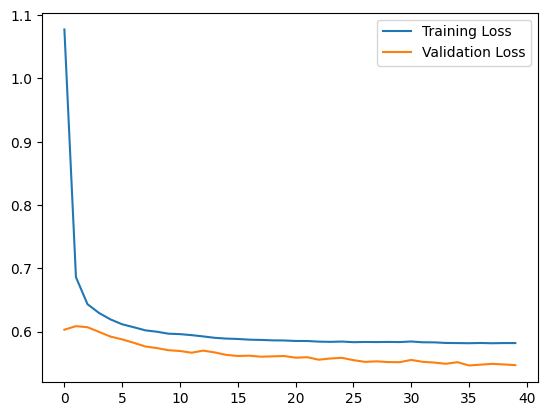

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


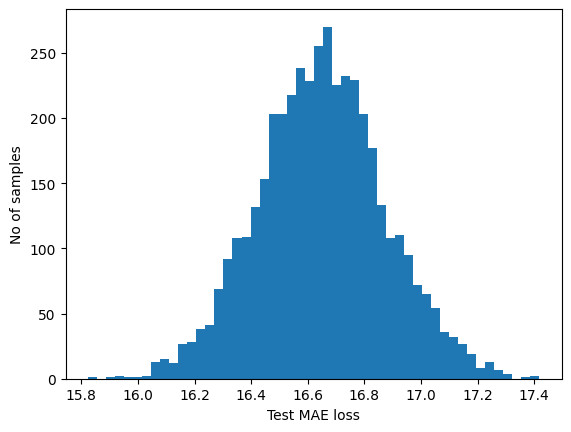

Reconstruction error threshold:  17.02763977058496

Vanilla Autoencoder Results:
  F1 Score: 0.1281
  Precision: 0.5139
  Recall: 0.0732


In [56]:
model = tf.keras.Sequential(
    [
        layers.Dense(8),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(0.2),

        layers.Dense(4),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(0.2),

        layers.Dense(2, activation="linear"),

        layers.Dense(4),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(0.2),

        layers.Dense(8),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(0.2),
        layers.Dense(1, activation="linear")
    ]
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()
history = model.fit(
    X_train_scaled,
    X_train_scaled,
    epochs=40,
    batch_size=64,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

# Predict on the TEST data, not training data
X_test_pred = model.predict(X_test_scaled)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test_scaled), axis=1)


plt.hist(test_mae_loss, bins=50)
plt.xlabel("Test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.  Consider using a percentile for robustness.
threshold = np.percentile(test_mae_loss, 95) # Example percentile, adjust as needed.
print("Reconstruction error threshold: ", threshold)

#Detect anomaly using the threshold on reconstruction error
y_pred_ae_binary = (test_mae_loss > threshold).astype(int)

# Evaluate the model using test data
f1_ae = f1_score(y_test, y_pred_ae_binary)
precision_ae = precision_score(y_test, y_pred_ae_binary)
recall_ae = recall_score(y_test, y_pred_ae_binary)

print("\nVanilla Autoencoder Results:")
print(f"  F1 Score: {f1_ae:.4f}")
print(f"  Precision: {precision_ae:.4f}")
print(f"  Recall: {recall_ae:.4f}")

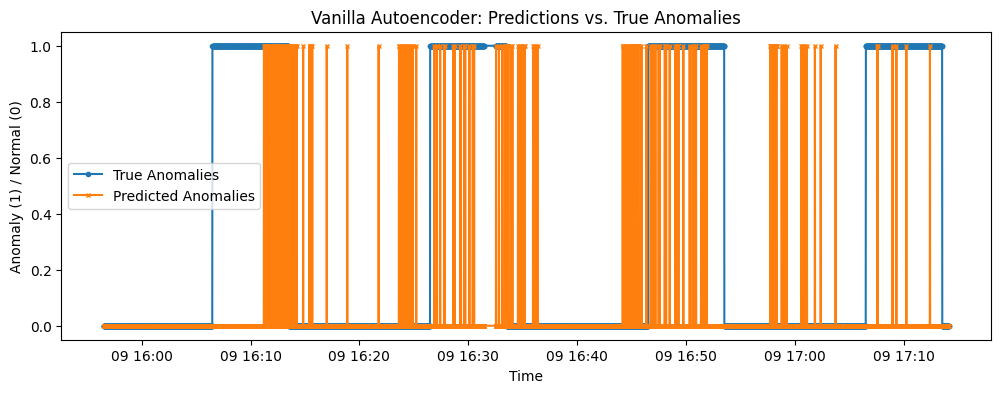

In [57]:
# Plot CAE predictions vs true anomalies (Corrected)
plt.figure(figsize=(12, 4))
plt.plot(test_valve2.index, y_test, label='True Anomalies', marker='o', linestyle='-', markersize=3)  # Plot the true anomalies
plt.plot(test_valve2.index, y_pred_ae_binary, label='Predicted Anomalies', marker='x', linestyle='-', markersize=3)  # Plot the predicted anomalies.  Using binary predictions here!
plt.title("Vanilla Autoencoder: Predictions vs. True Anomalies")
plt.xlabel("Time")
plt.ylabel("Anomaly (1) / Normal (0)")
plt.legend()
plt.show()

### Анализ полученных результатов
В ходе проведения экспериментов по обнаружению аномалий с использованием различных методов были получены следующие результаты:

1. KNN (Local Outlier Factor)  
Первый набор результатов:  
F1 Score: 0.0109  
Precision: 0.3182  
Recall: 0.0055  
Второй набор результатов:  
F1 Score: 0.0144  
Precision: 0.7333  
Recall: 0.0073  
Результаты KNN показывают крайне низкие значения F1 Score и Recall, что указывает на слабую способность модели обнаруживать аномалии. Первый набор результатов демонстрирует особенно низкие значения Recall, что означает, что большинство аномалий остаются неидентифицированными. Второй набор демонстрирует более высокое значение Precision, однако Recall остается недостаточным, что приводит к значительному количеству пропущенных аномалий.

2. Random Forest  
Первый набор результатов:  
F1 Score: 0.0775  
Precision: 0.3302  
Recall: 0.0439  
Второй набор результатов:  
F1 Score: 0.0758  
Precision: 0.3283  
Recall: 0.0428  
Random Forest показывает аналогично низкие значения F1 Score и Recall, что указывает на недостаточную эффективность в выявлении аномалий. Несмотря на некоторое улучшение Precision, значения Recall остаются крайне низкими, что подчеркивает проблемы с выявлением аномалий в данных.

3. Convolutional Autoencoder  
Первый набор результатов:  
F1 Score: 0.2322  
Precision: 0.9229  
Recall: 0.1328  
Второй набор результатов:  
F1 Score: 0.1696  
Precision: 0.6806  
Recall: 0.0969  
Convolutional Autoencoder показывает лучшие результаты по сравнению с KNN и Random Forest, с чуть более высокими значениями F1 Score и Recall. Высокий Precision свидетельствует об их способности правильно классифицировать нормальные данные, однако также наблюдается проблема с низким Recall, что говорит о большом количестве пропущенных аномалий.


5. Vanilla Autoencoder  
Порог ошибки реконструкции:  
18.08  
F1 Score: 0.2090  
Precision: 0.8304  
Recall: 0.1195  
Порог ошибки реконструкции:  
17.028  
F1 Score: 0.1281  
Precision: 0.5139  
Recall: 0.0732  
Результаты Vanilla Autoencoder также показывают высокие значения Precision, но низкие значения Recall, что опять же указывает на проблемы с обнаружением аномалий. Разные пороги ошибок реконструкции влияют на результаты, и важно находить баланс между Precision и Recall.

### Заключение
Общая тенденция среди всех моделей заключается в высоком значении Precision и низком Recall, что указывает на проблемы с обнаружением аномалий. Модели проявляют высокую точность в определении нормальных данных, но не способны надлежащим образом выявлять аномалии.

Это говорит о необходимости доработки, оптимизации методов и настройки параметров для улучшения способностей моделей к обнаружению аномалий. Возможные направления для улучшений могут включать использование более сложных методов выбора признаков, обогащение данных, а также рассмотрение комбинирования нескольких моделей для достижения лучших результатов.